In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns


##a.Download csv files from

https://catalog.data.gov/dataset/restaurant-and-market-health-inspections

https://catalog.data.gov/dataset/hcidla-affordable-housing-projects-list-2003-to-present

In [2]:
# Loading and downloading the restaurant health inspections dataset
restaurant_data = pd.read_csv('https://data.lacity.org/api/views/29fd-3paw/rows.csv?accessType=DOWNLOAD')
restaurant_data.head()

serial_number           activity_date        facility_name  score grade  \
0     DAJ00E07B  12/29/2017 12:00:00 AM  HABITAT COFFEE SHOP     95     A   
1     DAQOKRFZB  12/29/2017 12:00:00 AM             REILLY'S     92     A   
2     DASJI4LUR  12/29/2017 12:00:00 AM       STREET CHURROS     93     A   
3     DA40LU5AT  12/29/2017 12:00:00 AM    TRINITI ECHO PARK     94     A   
4     DAXV2RMYC  12/29/2017 12:00:00 AM               POLLEN     94     A   

   service_code service_description employee_id           facility_address  \
0             1  ROUTINE INSPECTION   EE0000923     3708 N EAGLE ROCK BLVD   
1             1  ROUTINE INSPECTION   EE0000633        100 WORLD WAY # 120   
2             1  ROUTINE INSPECTION   EE0000835  6801 HOLLYWOOD BLVD # 253   
3             1  ROUTINE INSPECTION   EE0000923         1814 W SUNSET BLVD   
4             1  ROUTINE INSPECTION   EE0000923         2100 ECHO PARK AVE   

  facility_city facility_id facility_state facility_zip   owner_id  \
0   LOS ANGELES   FA0170465             CA        90065  OW0178123   
1   LOS ANGELES   FA0244690             CA        90045  OW0208441   
2   LOS ANGELES   FA0224109             CA        90028  OW0228670   
3   LOS ANGELES   FA0252528             CA   90026-3227  OW0246287   
4   LOS ANGELES   FA0252789             CA        90026  OW0246479   

                  owner_name                         pe_description  \
0   GLASSELL COFFEE SHOP LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
1  AREAS SKYVIEW LAX JV, LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
2         STREETCHURROS, INC       RESTAURANT (0-30) SEATS LOW RISK   
3       AMERICAN HOSPITALITY  RESTAURANT (0-30) SEATS MODERATE RISK   
4    POLLEN AND PASTRY , LLC  RESTAURANT (0-30) SEATS MODERATE RISK   

   program_element_pe         program_name program_status  record_id  
0                1631  HABITAT COFFEE SHOP         ACTIVE  PR0160774  
1                1631             REILLY'S         ACTIVE  PR0193026  
2                1630       STREET CHURROS         ACTIVE  PR0179282  
3                1631    TRINITI ECHO PARK         ACTIVE  PR0201836  
4                1631               POLLEN         ACTIVE  PR0202148

In [3]:
# Loading and downloading the affordable housing projects dataset

housing_data = pd.read_csv('https://data.lacity.org/api/views/mymu-zi3s/rows.csv?accessType=DOWNLOAD')
housing_data.head()

APN PROJECT NUMBER                       NAME DEVELOPMENT STAGE  \
0  5143020023      02-118256       SAN LUCAS APARTMENTS        In-Service   
1  5050011005      05-117193     LEEWARD APTS. (SITE 7)        In-Service   
2  5114014020      14-121652    FLORENCE MILLS (SITE 5)        In-Service   
3  4012018025          60013  MORGAN PLACE SENIOR APTS.        In-Service   
4  5153030026          50036             WITMER HEIGHTS        In-Service   

  CONSTRUCTION TYPE                                       SITE ADDRESS  \
0  NEW CONSTRUCTION               1221 W 7TH ST  Los Angeles, CA 90017   
1             REHAB            2809 S WEST BLVD  Los Angeles, CA 90016   
2  NEW CONSTRUCTION  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3  NEW CONSTRUCTION        7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               NaN             116 S WITMER ST  Los Angeles, CA 90026   

   SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                       1       1           WESTLAKE         196  ...   
1                      10       7  CRENSHAW DISTRICT           0  ...   
2                       9       5            CENTRAL           0  ...   
3                       8       1          HYDE PARK          55  ...   
4                      13       1     TEMPLE-BEAUDRY          49  ...   

                MANAGEMENT COMPANY   CONTACT PHONE  \
0         GSL PROPERRTY MANAGEMENT             NaN   
1  ALPHA PROPERTY MANAGEMENT, INC.  (323) 231-4174   
2   BARKER MANAGEMENT INCORPORATED  (714) 533-3450   
3                ABODE COMMUNITIES  (213) 225-2772   
4         THE JOHN STEWART COMPANY  (213) 482-9122   

                                               PHOTO   JOBS  \
0  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4  click here (http://hcidapp.lacity.org/mpphotos...   95.0   

                                 PROJECT SUMMARY URL  CONTRACT NUMBERS  \
0  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
1  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
2  click here (http://hcidapp.lacity.org/ahtfRepo...          C-129358   
3  click here (http://hcidapp.lacity.org/ahtfRepo...          C-111486   
4  click here (http://hcidapp.lacity.org/ahtfRepo...          C-109452   

                DATE STAMP  SITE LONGITUDE  SITE LATITUDE  \
0  2024-08-05T00:00:00.000      -118.26584       34.05235   
1  2024-08-05T00:00:00.000      -118.34182       34.03071   
2  2024-08-05T00:00:00.000      -118.25740       34.01115   
3  2024-08-05T00:00:00.000      -118.33139       33.97355   
4  2024-08-05T00:00:00.000      -118.26086       34.06173   

             GPS_COORDS ON MAP  
0  POINT (-118.26584 34.05235)  
1  POINT (-118.34182 34.03071)  
2   POINT (-118.2574 34.01115)  
3  POINT (-118.33139 33.97355)  
4  POINT (-118.26086 34.06173)  

[5 rows x 31 columns]

##b.EDA on the restaurant_data

In [4]:
# Checking the data types and initial structure of restaurant dataset
restaurant_info = restaurant_data.dtypes
restaurant_info

serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object

In [5]:
#Converting activity_date to DateTime
restaurant_data['activity_date'] = pd.to_datetime(restaurant_data['activity_date'], errors='coerce')


<ipython-input-5-ae0406b0ccf4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  restaurant_data['activity_date'] = pd.to_datetime(restaurant_data['activity_date'], errors='coerce')


In [16]:
restaurant_data.describe()

activity_date         score  service_code  \
count                          67573  67573.000000  67573.000000   
mean   2017-01-24 08:12:17.335918336     93.361890      7.618028   
min              2015-07-01 00:00:00     64.000000      1.000000   
25%              2016-04-21 00:00:00     91.000000      1.000000   
50%              2017-01-19 00:00:00     94.000000      1.000000   
75%              2017-10-30 00:00:00     96.000000      1.000000   
max              2018-07-31 00:00:00    100.000000    401.000000   
std                              NaN      3.982303     51.024028   

       program_element_pe  
count        67573.000000  
mean          1629.463454  
min           1610.000000  
25%           1631.000000  
50%           1632.000000  
75%           1635.000000  
max           1641.000000  
std              9.414625

In [7]:
#Handling Missing Values
#Purpose: This checks how many missing values exist in each column.
missing_values = restaurant_data.isnull().sum()
missing_values


serial_number           0
activity_date           0
facility_name           0
score                   0
grade                   3
service_code            0
service_description     0
employee_id             0
facility_address        0
facility_city           0
facility_id             0
facility_state          0
facility_zip            0
owner_id                0
owner_name              0
pe_description          0
program_element_pe      0
program_name           29
program_status          0
record_id               0
dtype: int64

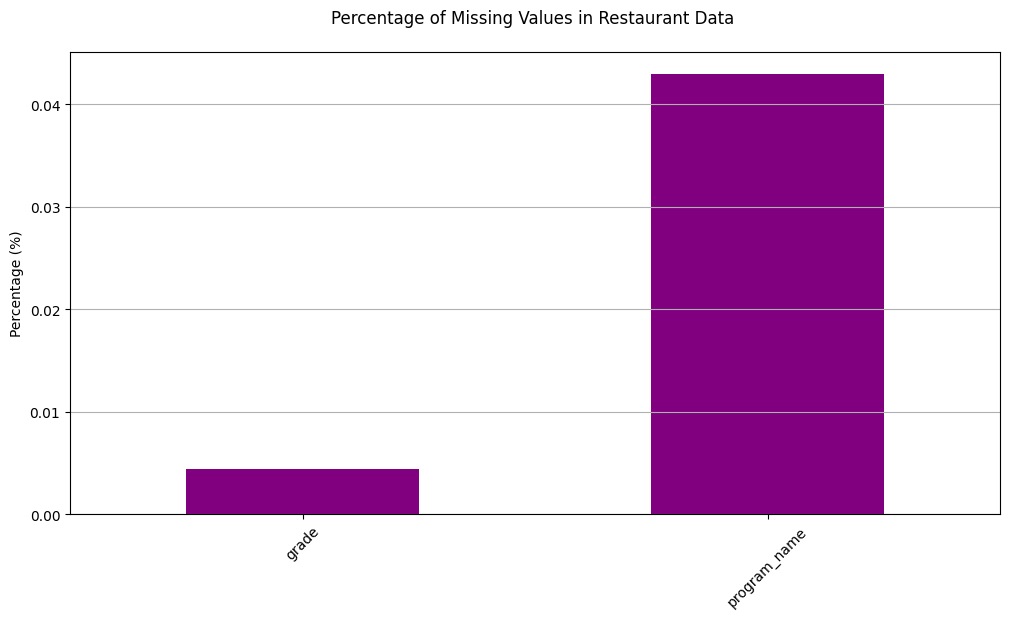

In [8]:
# Visualize missing values for restaurant data using bar plot
plt.figure(figsize=(12, 6))
restaurant_missing = restaurant_data.isnull().mean() * 100
restaurant_missing[restaurant_missing > 0].plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values in Restaurant Data \n')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Filling Missing Grade Based on Score

Purpose: Imputes missing grades based on the score. If the score is above 90, the grade is filled as 'A', between 80-89 is 'B', and between 70-79 is 'C'.

In [9]:
restaurant_data['grade'] = restaurant_data['grade'].fillna(restaurant_data['score'].apply(lambda x: 'A' if x >= 90 else 'B' if x >= 80 else 'C'))


In [ ]:
restaurant_data.describe()

Handling Missing Program Name with Mode.

Purpose: Replaces missing values in the program_name column with the most frequent (mode) value.

In [11]:
restaurant_data['program_name'].fillna(restaurant_data['program_name'].mode()[0], inplace=True)


Correcting Unexpected Entries in Grade

Purpose: Replaces unexpected blank spaces in the grade column with 'Unknown'.

In [12]:
restaurant_data['grade'] = restaurant_data['grade'].replace(' ', 'Unknown')


In [13]:
missing_values = restaurant_data.isnull().sum()
missing_values

serial_number          0
activity_date          0
facility_name          0
score                  0
grade                  0
service_code           0
service_description    0
employee_id            0
facility_address       0
facility_city          0
facility_id            0
facility_state         0
facility_zip           0
owner_id               0
owner_name             0
pe_description         0
program_element_pe     0
program_name           0
program_status         0
record_id              0
dtype: int64

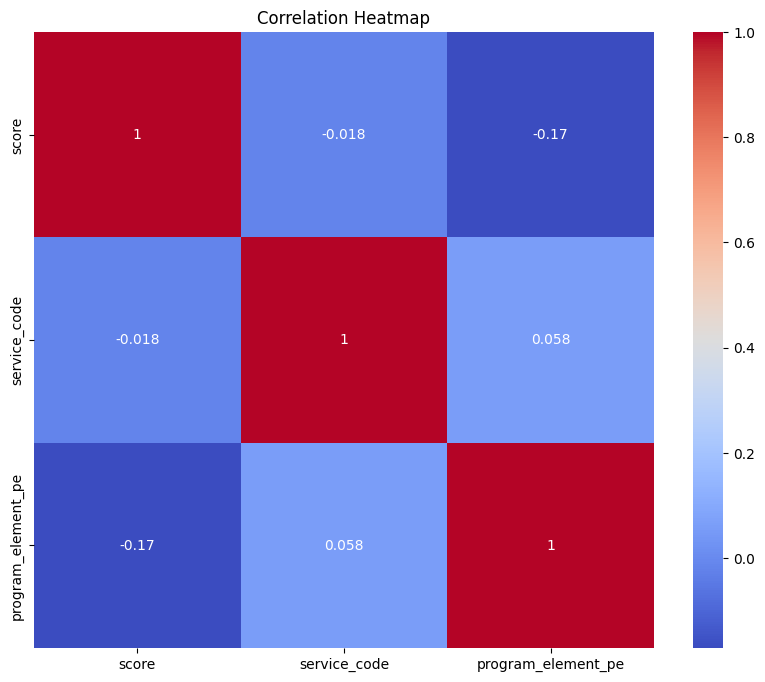

In [19]:
import seaborn as sns

# Select only numeric columns
numeric_data = restaurant_data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

iii. Check for unexpected entries in certain columns. Correct them if necessary and feasible.

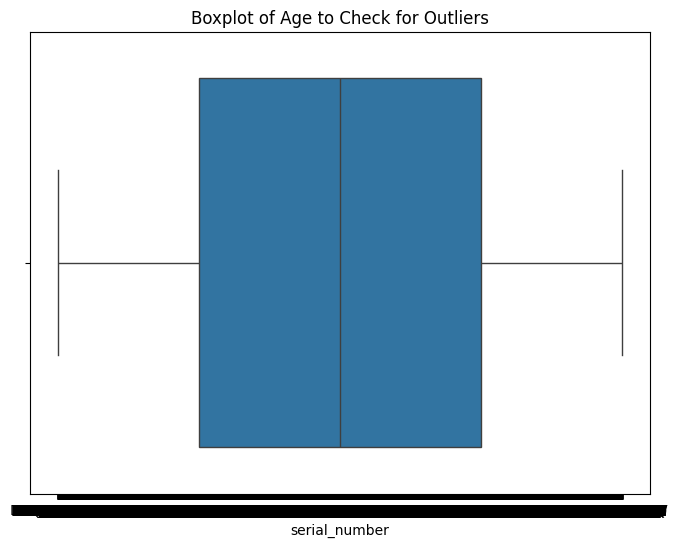

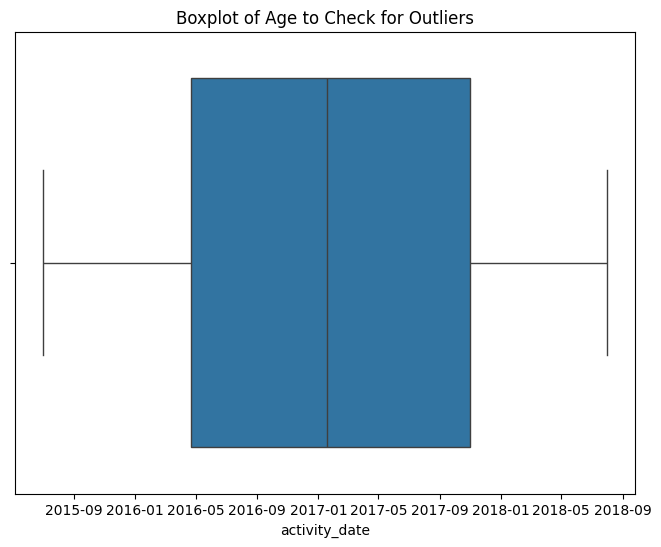

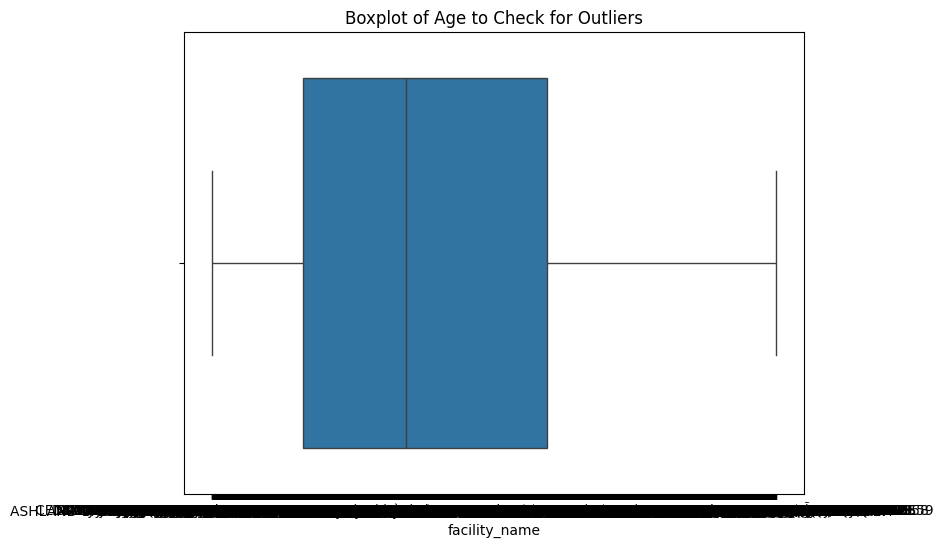

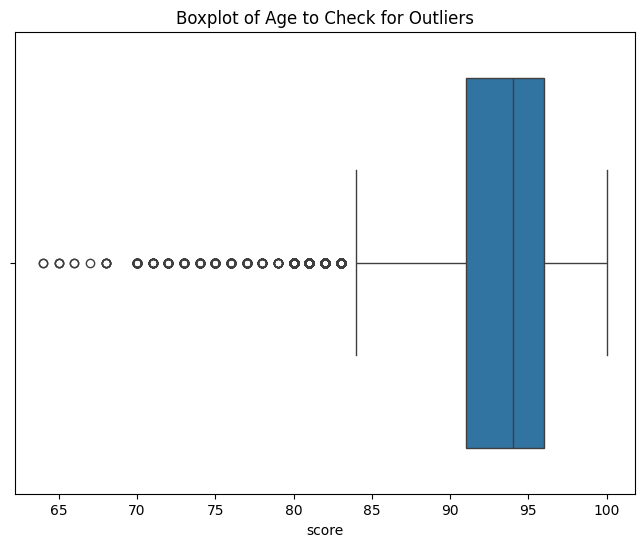

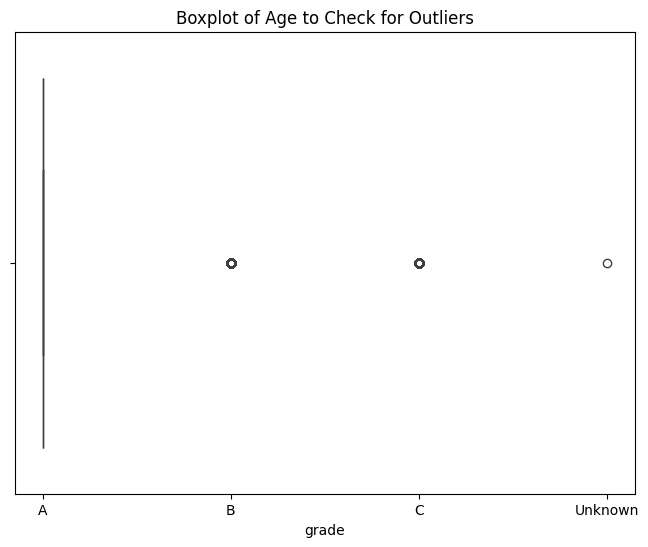

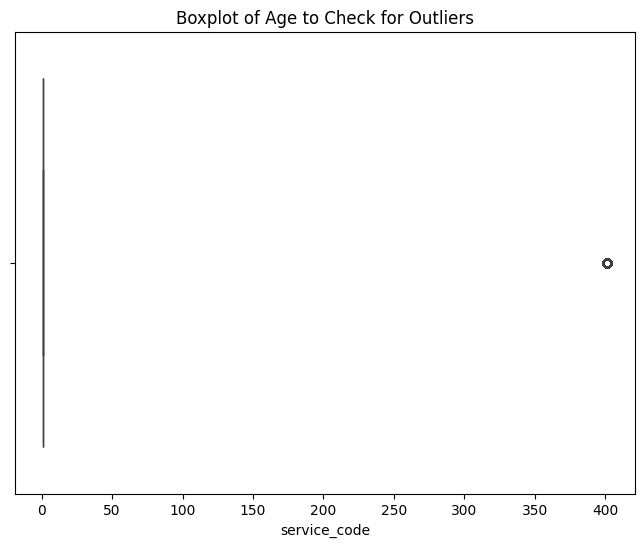

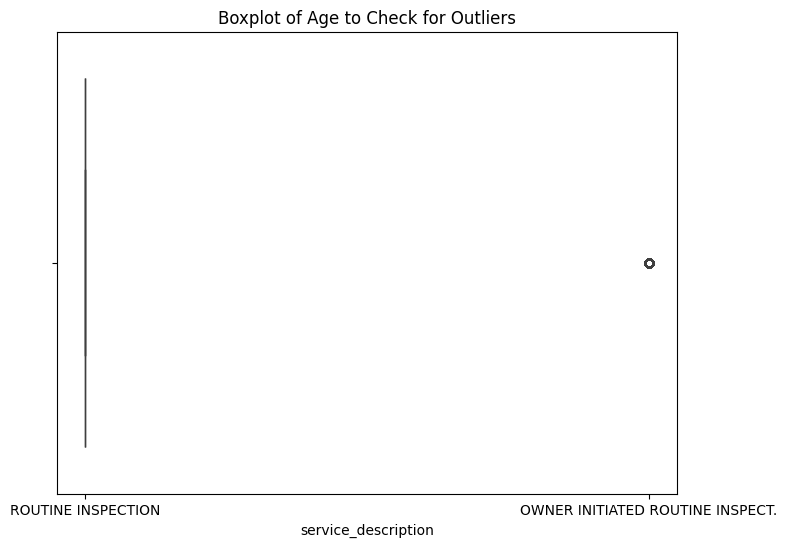

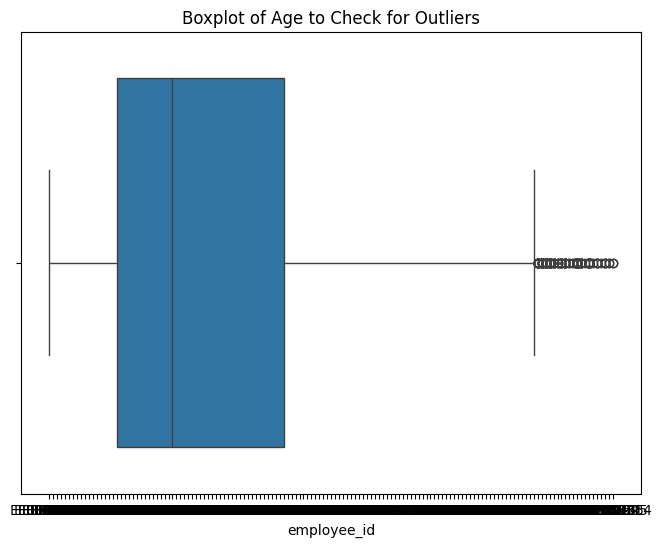

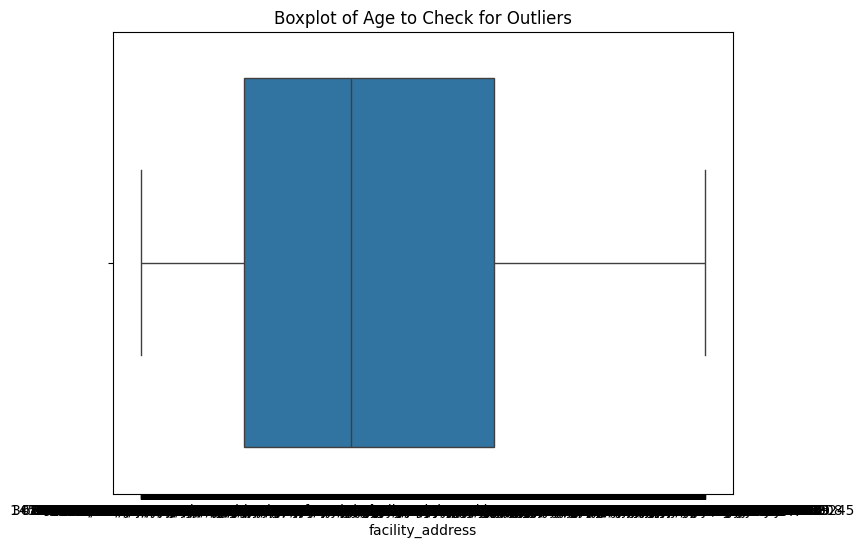

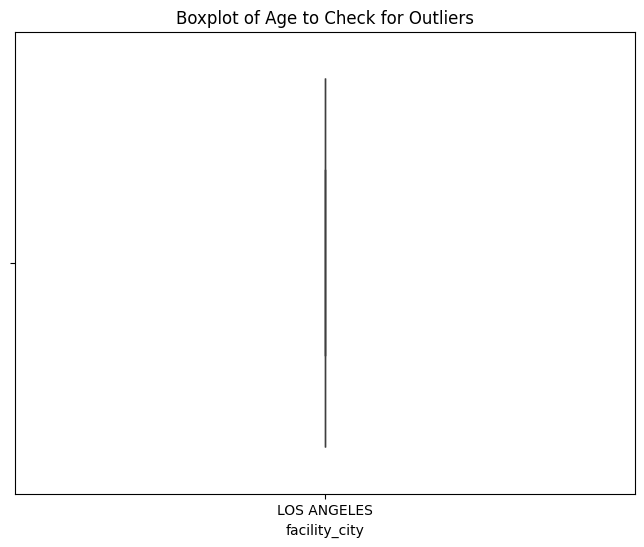

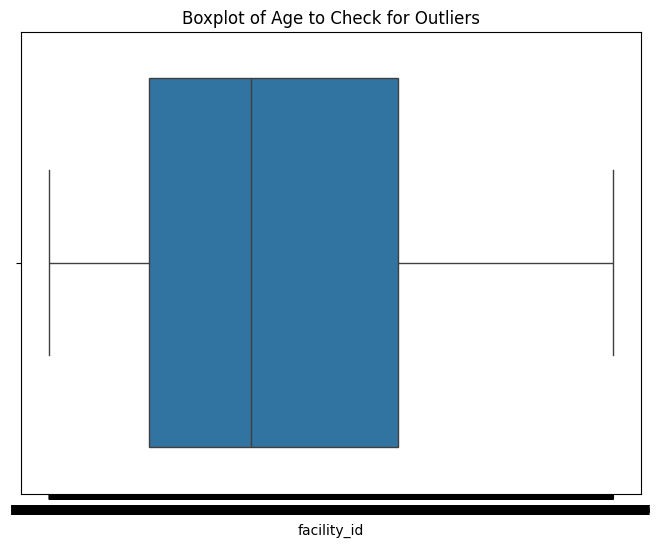

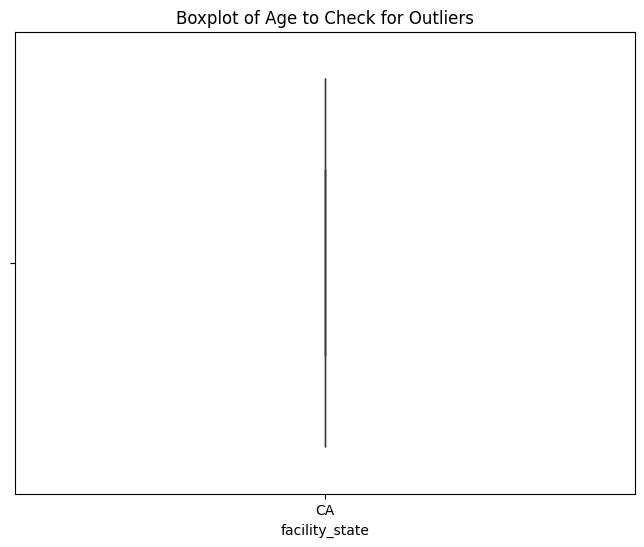

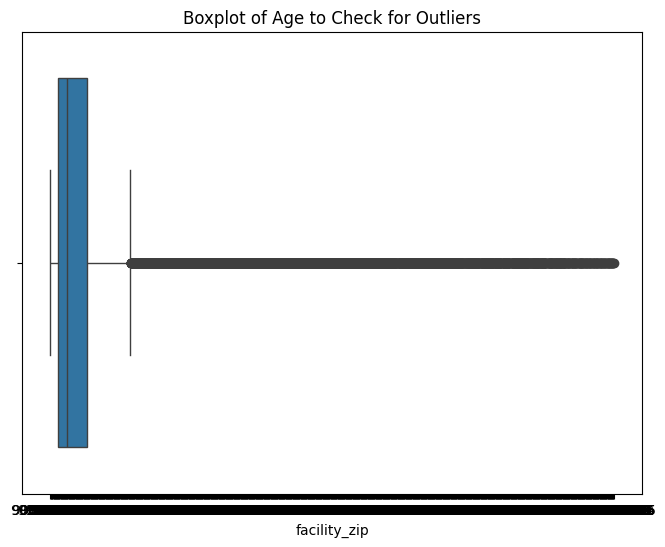

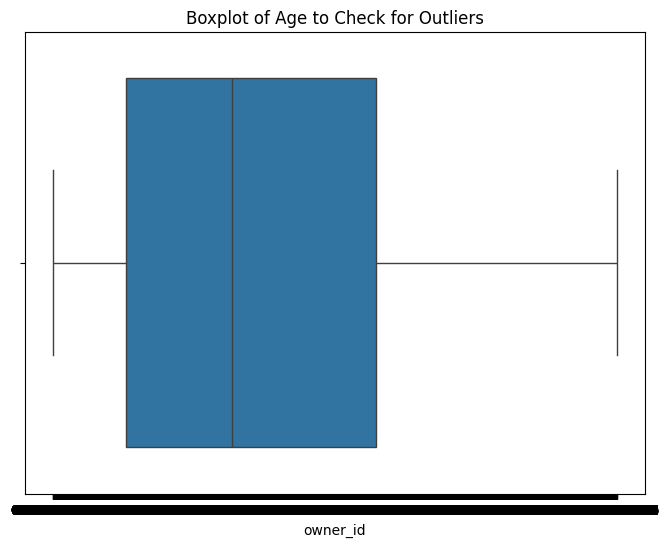

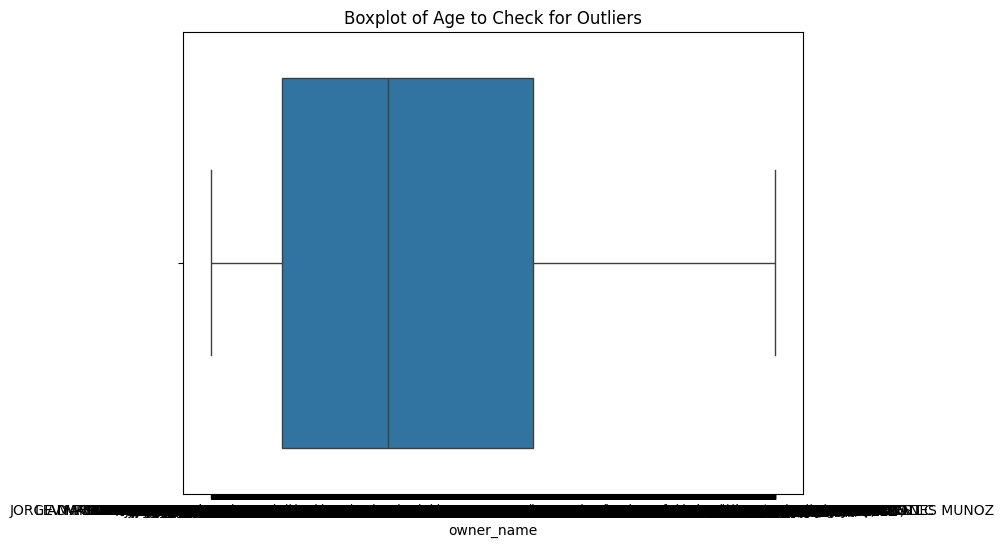

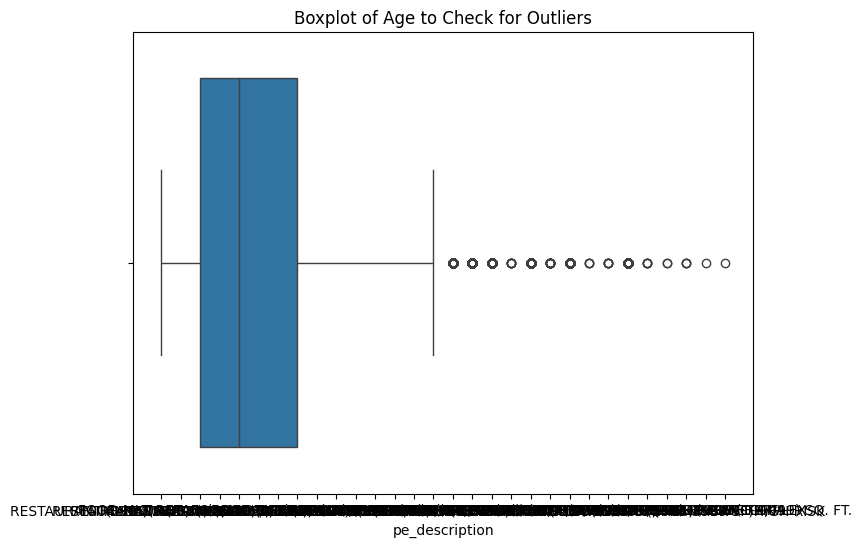

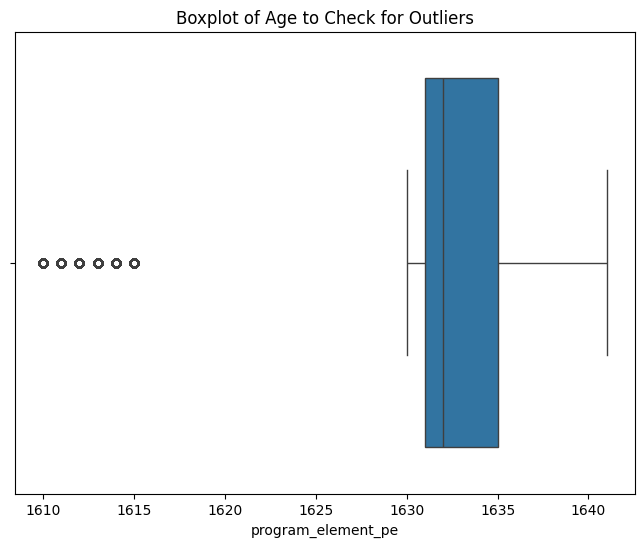

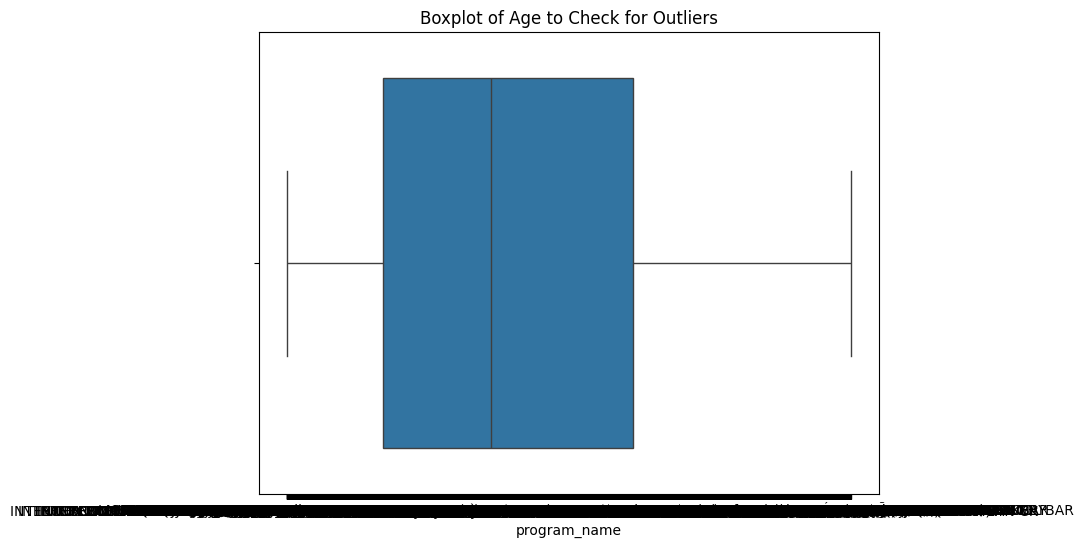

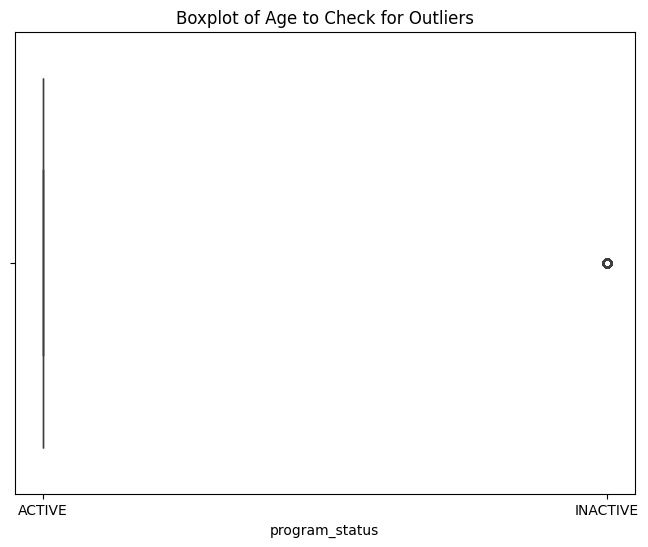

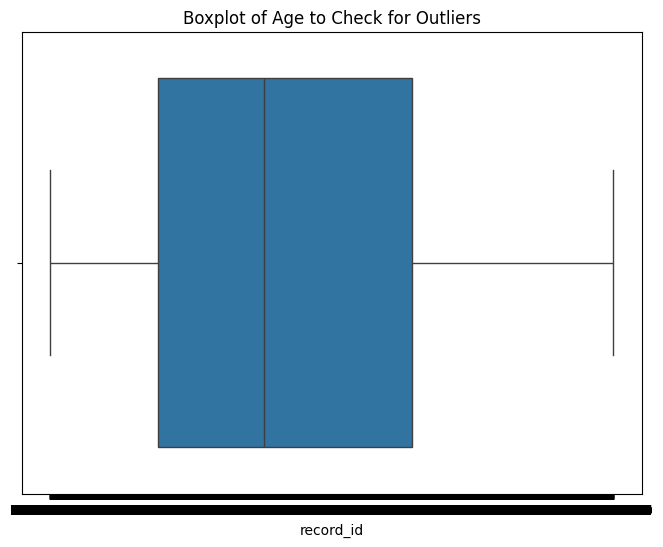

In [14]:
for column in restaurant_data.columns:
    #if restaurant_data[column].dtype in [int, float]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=restaurant_data, x=column)
    plt.title('Boxplot of Age to Check for Outliers')
    plt.show()

#iv. Plot some graphs to understand the data
###Visualizing the Data

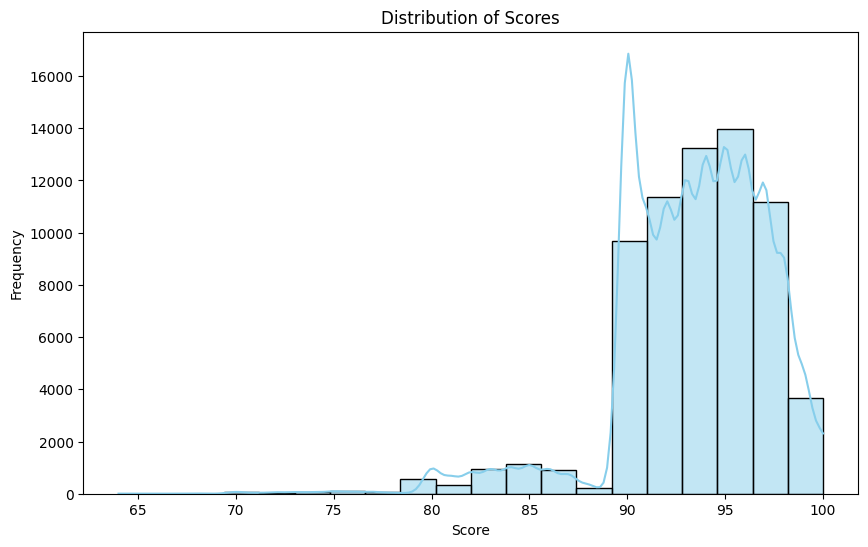

In [ ]:
#Plot 1: Distribution of Scores
#Purpose: Visualizes the distribution of scores to see how they are spread across the dataset.

plt.figure(figsize=(10, 6))
sns.histplot(restaurant_data['score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


<ipython-input-15-d936fbcae31a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=restaurant_data, palette='Set2')


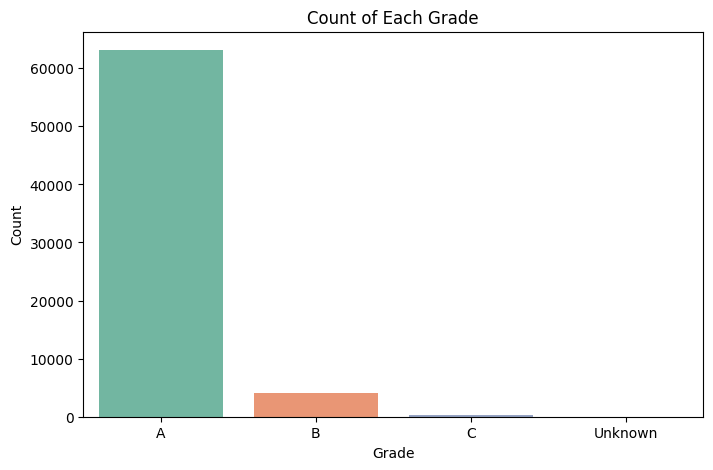

In [ ]:
#Plot 2: Count of Each Grade
#Purpose: Shows the number of inspections that received each grade ('A', 'B', 'C', etc.).
plt.figure(figsize=(8, 5))
sns.countplot(x='grade', data=restaurant_data, palette='Set2')
plt.title('Count of Each Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


<ipython-input-16-6e5f4e67956d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=restaurant_data, palette='Set3')


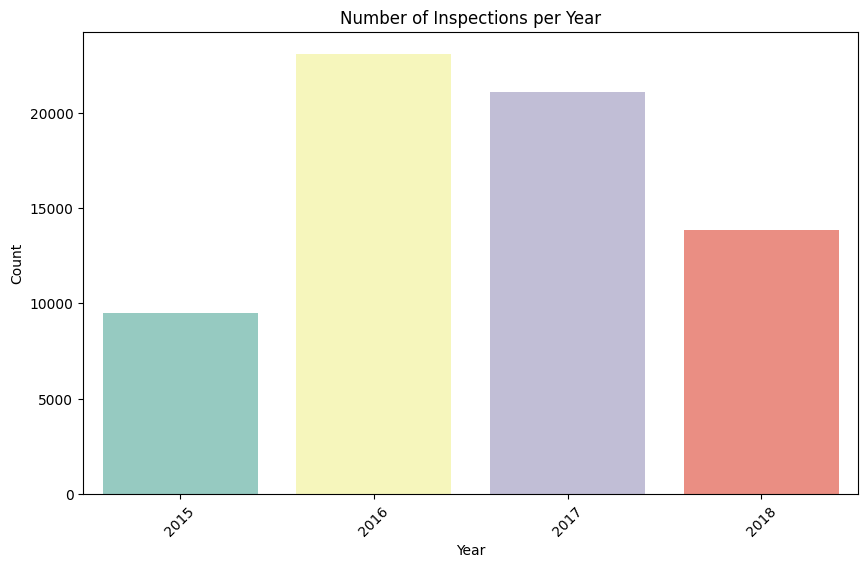

In [ ]:
#Plot 3: Number of Inspections per Year
#Purpose: Displays the number of inspections per year to observe trends over time.
restaurant_data['year'] = restaurant_data['activity_date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=restaurant_data, palette='Set3')
plt.title('Number of Inspections per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#EDA ON THE housing_data

In [ ]:
# Loading and downloading the affordable housing projects dataset

housing_data = pd.read_csv('https://data.lacity.org/api/views/mymu-zi3s/rows.csv?accessType=DOWNLOAD')
housing_data.head()

APN PROJECT NUMBER                       NAME DEVELOPMENT STAGE  \
0  5143020023      02-118256       SAN LUCAS APARTMENTS        In-Service   
1  5050011005      05-117193     LEEWARD APTS. (SITE 7)        In-Service   
2  5114014020      14-121652    FLORENCE MILLS (SITE 5)        In-Service   
3  4012018025          60013  MORGAN PLACE SENIOR APTS.        In-Service   
4  5153030026          50036             WITMER HEIGHTS        In-Service   

  CONSTRUCTION TYPE                                       SITE ADDRESS  \
0  NEW CONSTRUCTION               1221 W 7TH ST  Los Angeles, CA 90017   
1             REHAB            2809 S WEST BLVD  Los Angeles, CA 90016   
2  NEW CONSTRUCTION  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3  NEW CONSTRUCTION        7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               NaN             116 S WITMER ST  Los Angeles, CA 90026   

   SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                       1       1           WESTLAKE         196  ...   
1                      10       7  CRENSHAW DISTRICT           0  ...   
2                       9       5            CENTRAL           0  ...   
3                       8       1          HYDE PARK          55  ...   
4                      13       1     TEMPLE-BEAUDRY          49  ...   

                MANAGEMENT COMPANY   CONTACT PHONE  \
0         GSL PROPERRTY MANAGEMENT             NaN   
1  ALPHA PROPERTY MANAGEMENT, INC.  (323) 231-4174   
2   BARKER MANAGEMENT INCORPORATED  (714) 533-3450   
3                ABODE COMMUNITIES  (213) 225-2772   
4         THE JOHN STEWART COMPANY  (213) 482-9122   

                                               PHOTO   JOBS  \
0  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4  click here (http://hcidapp.lacity.org/mpphotos...   95.0   

                                 PROJECT SUMMARY URL  CONTRACT NUMBERS  \
0  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
1  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
2  click here (http://hcidapp.lacity.org/ahtfRepo...          C-129358   
3  click here (http://hcidapp.lacity.org/ahtfRepo...          C-111486   
4  click here (http://hcidapp.lacity.org/ahtfRepo...          C-109452   

                DATE STAMP  SITE LONGITUDE  SITE LATITUDE  \
0  2024-08-05T00:00:00.000      -118.26584       34.05235   
1  2024-08-05T00:00:00.000      -118.34182       34.03071   
2  2024-08-05T00:00:00.000      -118.25740       34.01115   
3  2024-08-05T00:00:00.000      -118.33139       33.97355   
4  2024-08-05T00:00:00.000      -118.26086       34.06173   

             GPS_COORDS ON MAP  
0  POINT (-118.26584 34.05235)  
1  POINT (-118.34182 34.03071)  
2   POINT (-118.2574 34.01115)  
3  POINT (-118.33139 33.97355)  
4  POINT (-118.26086 34.06173)  

[5 rows x 31 columns]

In [ ]:
# Checking the data types and initial structure of affordable housing projects dataset
housing_info = housing_data.dtypes
housing_info

APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE                object
SUPPORTIVE HOUSING          object
SH UNITS PER SITE            int64
DATE FUNDED                 object
LAHD FUNDED                float64
LEVERAGE                   float64
TAX EXEMPT CONDUIT BOND      int64
TDC                        float64
IN-SERVICE DATE             object
DEVELOPER                   object
MANAGEMENT COMPANY          object
CONTACT PHONE               object
PHOTO                       object
JOBS                       float64
PROJECT SUMMARY URL         object
CONTRACT NUMBERS            object
DATE STAMP                  object
SITE LONGITUDE             float64
SITE LATITUDE              float64
GPS_COORDS ON MAP           object
dtype: object

In [ ]:
# Checking the missing values for housing datset
housing_missing = housing_data.isnull().sum()
housing_missing

APN                          0
PROJECT NUMBER               0
NAME                         0
DEVELOPMENT STAGE            1
CONSTRUCTION TYPE           34
SITE ADDRESS                 0
SITE  COUNCIL DISTRICT       0
SITE #                       0
SITE COMMUNITY               7
SITE UNITS                   0
PROJECT TOTAL UNITS          0
HOUSING TYPE                22
SUPPORTIVE HOUSING           0
SH UNITS PER SITE            0
DATE FUNDED                  1
LAHD FUNDED                  0
LEVERAGE                     0
TAX EXEMPT CONDUIT BOND      0
TDC                          0
IN-SERVICE DATE              0
DEVELOPER                   26
MANAGEMENT COMPANY          55
CONTACT PHONE               84
PHOTO                        0
JOBS                       180
PROJECT SUMMARY URL          0
CONTRACT NUMBERS           148
DATE STAMP                   0
SITE LONGITUDE               0
SITE LATITUDE                0
GPS_COORDS ON MAP            0
dtype: int64

In [ ]:
# Handle missing values

# Separate numeric and non-numeric columns
numeric_cols = housing_data.select_dtypes(include=['number']).columns
categorical_cols = housing_data.select_dtypes(exclude=['number']).columns

# Option 1: Drop rows with any missing values (if you want to remove them)
#df_dropped = housing_data.dropna()

# Option 2: Impute missing values
# - Numeric columns: fill missing values with the mean of the column
housing_data[numeric_cols] = housing_data[numeric_cols].fillna(housing_data[numeric_cols].mean())

# - Categorical columns: fill missing values with the mode (most frequent value)
for col in categorical_cols:
    housing_data[col] = housing_data[col].fillna(housing_data[col].mode()[0])

# Display the dataframe after handling missing values
print(housing_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      595 non-null    int64  
 1   PROJECT NUMBER           595 non-null    object 
 2   NAME                     595 non-null    object 
 3   DEVELOPMENT STAGE        595 non-null    object 
 4   CONSTRUCTION TYPE        595 non-null    object 
 5   SITE ADDRESS             595 non-null    object 
 6   SITE  COUNCIL DISTRICT   595 non-null    int64  
 7   SITE #                   595 non-null    int64  
 8   SITE COMMUNITY           595 non-null    object 
 9   SITE UNITS               595 non-null    int64  
 10  PROJECT TOTAL UNITS      595 non-null    int64  
 11  HOUSING TYPE             595 non-null    object 
 12  SUPPORTIVE HOUSING       595 non-null    object 
 13  SH UNITS PER SITE        595 non-null    int64  
 14  DATE FUNDED              5

In [ ]:
missing_values = housing_data.isnull().sum()
missing_values

APN                        0
PROJECT NUMBER             0
NAME                       0
DEVELOPMENT STAGE          0
CONSTRUCTION TYPE          0
SITE ADDRESS               0
SITE  COUNCIL DISTRICT     0
SITE #                     0
SITE COMMUNITY             0
SITE UNITS                 0
PROJECT TOTAL UNITS        0
HOUSING TYPE               0
SUPPORTIVE HOUSING         0
SH UNITS PER SITE          0
DATE FUNDED                0
LAHD FUNDED                0
LEVERAGE                   0
TAX EXEMPT CONDUIT BOND    0
TDC                        0
IN-SERVICE DATE            0
DEVELOPER                  0
MANAGEMENT COMPANY         0
CONTACT PHONE              0
PHOTO                      0
JOBS                       0
PROJECT SUMMARY URL        0
CONTRACT NUMBERS           0
DATE STAMP                 0
SITE LONGITUDE             0
SITE LATITUDE              0
GPS_COORDS ON MAP          0
dtype: int64

In [18]:
housing_data.describe()

APN  SITE  COUNCIL DISTRICT      SITE #  SITE UNITS  \
count  5.950000e+02              595.000000  595.000000  595.000000   
mean   4.931625e+09                8.425210    2.072269   54.868908   
std    1.153791e+09                4.631437    2.760317   49.132984   
min    2.103009e+09                1.000000    1.000000    0.000000   
25%    5.039024e+09                6.000000    1.000000   21.000000   
50%    5.143020e+09                9.000000    1.000000   49.000000   
75%    5.511022e+09               13.000000    1.000000   75.500000   
max    7.455014e+09               15.000000   20.000000  438.000000   

       PROJECT TOTAL UNITS  SH UNITS PER SITE   LAHD FUNDED      LEVERAGE  \
count           595.000000         595.000000  5.950000e+02  5.950000e+02   
mean             90.732773          20.235294  4.466108e+06  1.605931e+07   
std              65.384237          32.166210  5.053683e+06  1.321764e+07   
min               6.000000           0.000000  0.000000e+00  0.000000e+00   
25%              49.000000           0.000000  0.000000e+00  7.103994e+06   
50%              71.000000           0.000000  3.225000e+06  1.310000e+07   
75%             102.000000          37.500000  6.615000e+06  2.233964e+07   
max             438.000000         262.000000  3.968821e+07  9.407772e+07   

       TAX EXEMPT CONDUIT BOND           TDC         JOBS  SITE LONGITUDE  \
count             5.950000e+02  5.950000e+02   415.000000      595.000000   
mean              2.952402e+06  2.347782e+07   193.453012     -118.308551   
std               9.713841e+06  1.772533e+07   146.352206        0.077547   
min               0.000000e+00  0.000000e+00     5.000000     -118.606390   
25%               0.000000e+00  1.226428e+07    84.500000     -118.320325   
50%               0.000000e+00  1.886909e+07   174.000000     -118.285750   
75%               3.950000e+06  2.975500e+07   261.500000     -118.263290   
max               1.842604e+08  2.230181e+08  1165.000000     -118.165140   

       SITE LATITUDE  
count     595.000000  
mean       34.054275  
std         0.092567  
min        33.736140  
25%        34.011150  
50%        34.047810  
75%        34.086435  
max        34.324020

 ## Check for unexpected entries in certain columns

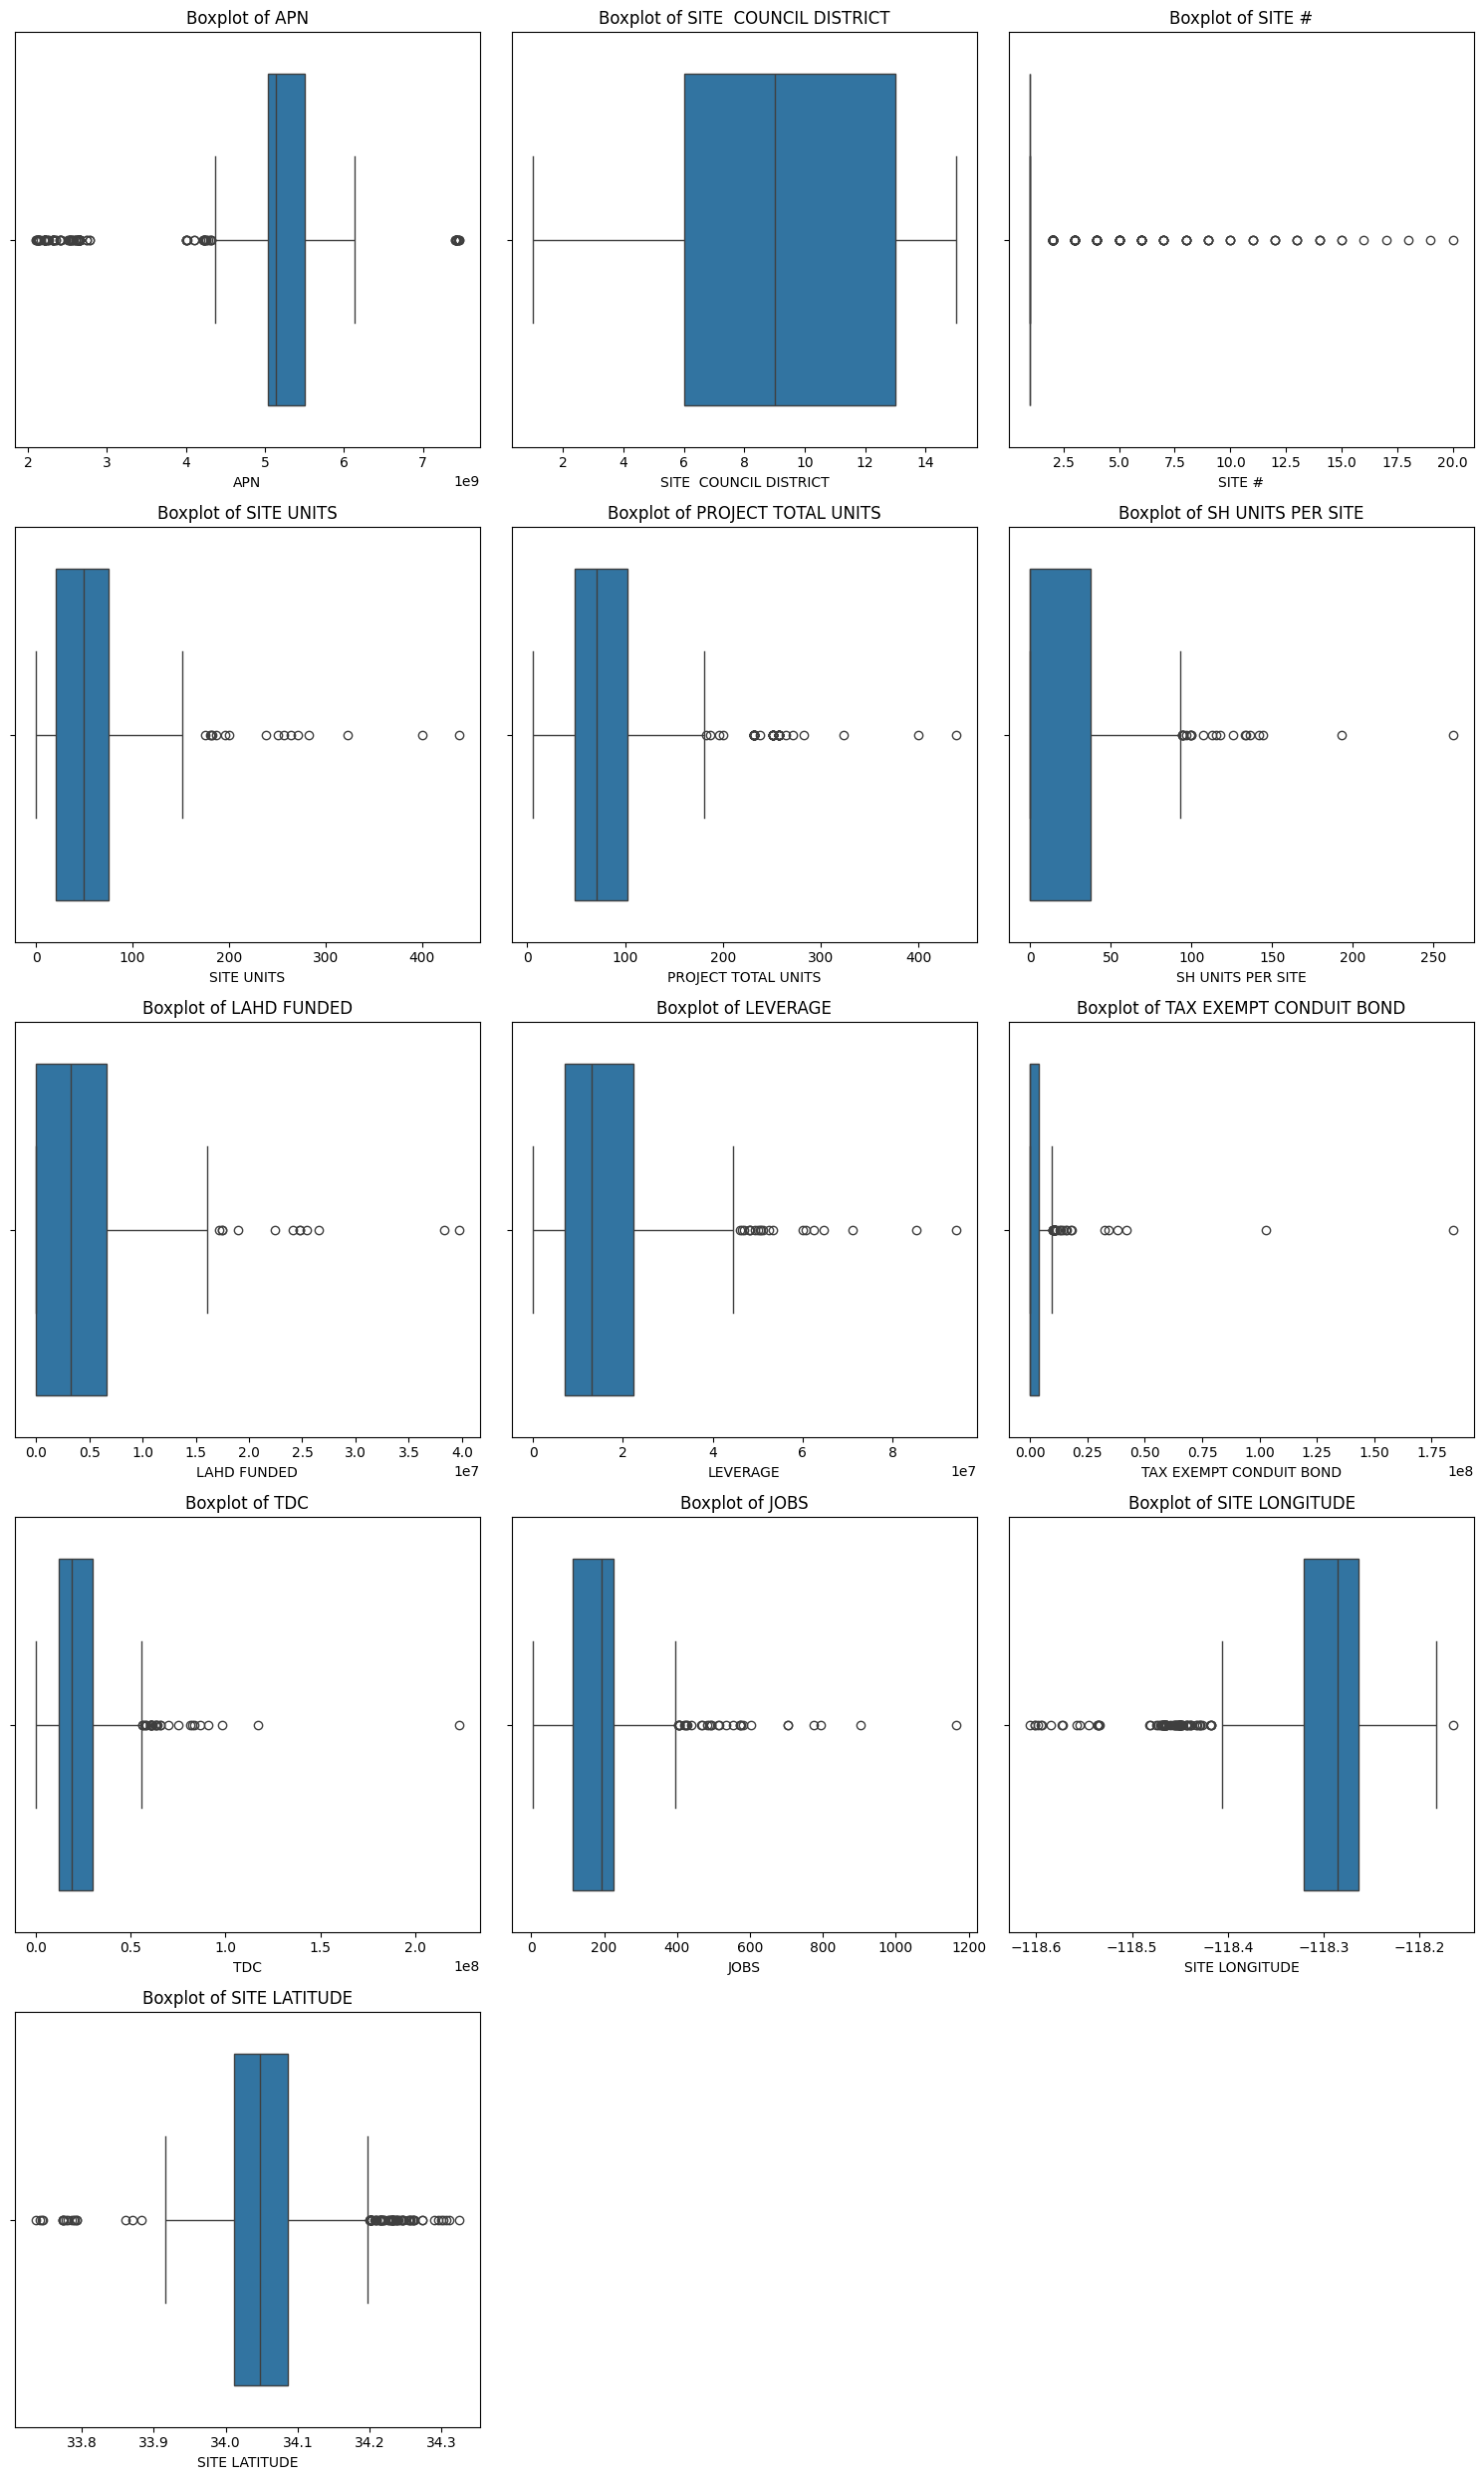

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get numeric columns from housing_data
numeric_cols = housing_data.select_dtypes(include=['number']).columns

# Dynamically calculate the number of rows and columns for the subplot grid
num_cols = len(numeric_cols)
n_cols = 3  # Number of plots per row
n_rows = math.ceil(num_cols / n_cols)  # Calculate the number of rows needed

# Create subplots with calculated grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Plot each numeric column in its own boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=housing_data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# List all column names in the dataset
print(housing_data.columns)

# Check data types to identify numeric and categorical columns
print(housing_data.dtypes)


Index(['APN', 'PROJECT NUMBER', 'NAME', 'DEVELOPMENT STAGE',
       'CONSTRUCTION TYPE', 'SITE ADDRESS', 'SITE  COUNCIL DISTRICT', 'SITE #',
       'SITE COMMUNITY', 'SITE UNITS', 'PROJECT TOTAL UNITS', 'HOUSING TYPE',
       'SUPPORTIVE HOUSING', 'SH UNITS PER SITE', 'DATE FUNDED', 'LAHD FUNDED',
       'LEVERAGE', 'TAX EXEMPT CONDUIT BOND', 'TDC', 'IN-SERVICE DATE',
       'DEVELOPER', 'MANAGEMENT COMPANY', 'CONTACT PHONE', 'PHOTO', 'JOBS',
       'PROJECT SUMMARY URL', 'CONTRACT NUMBERS', 'DATE STAMP',
       'SITE LONGITUDE', 'SITE LATITUDE', 'GPS_COORDS ON MAP'],
      dtype='object')
APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE      

## Plot some graphs to understand the data

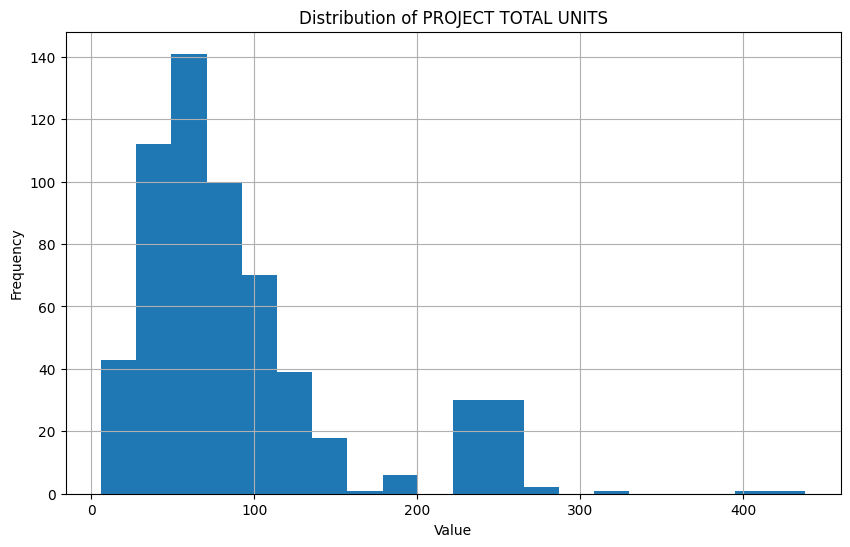

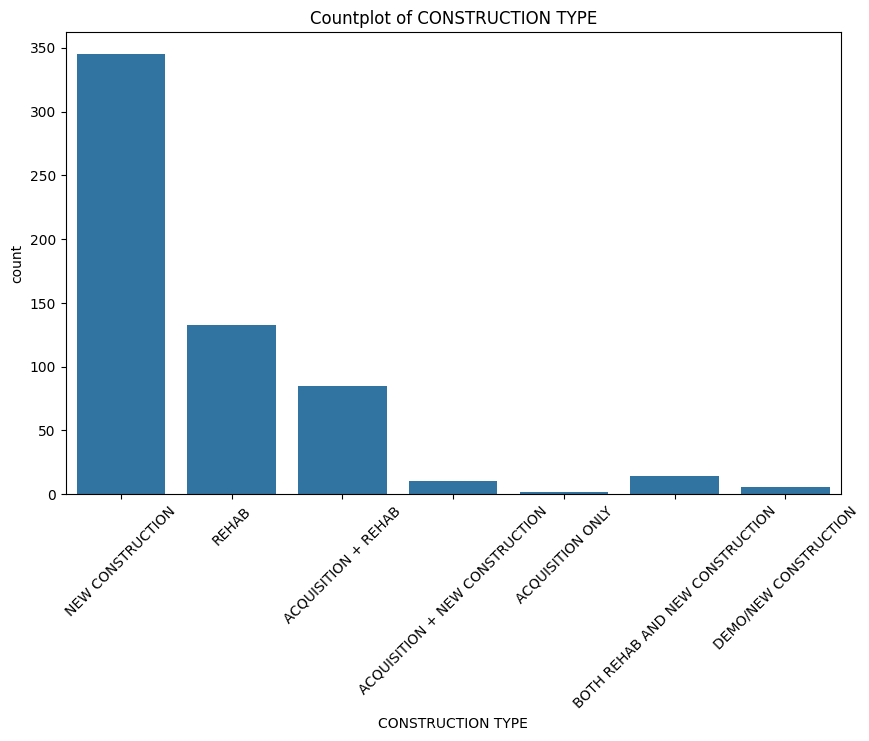

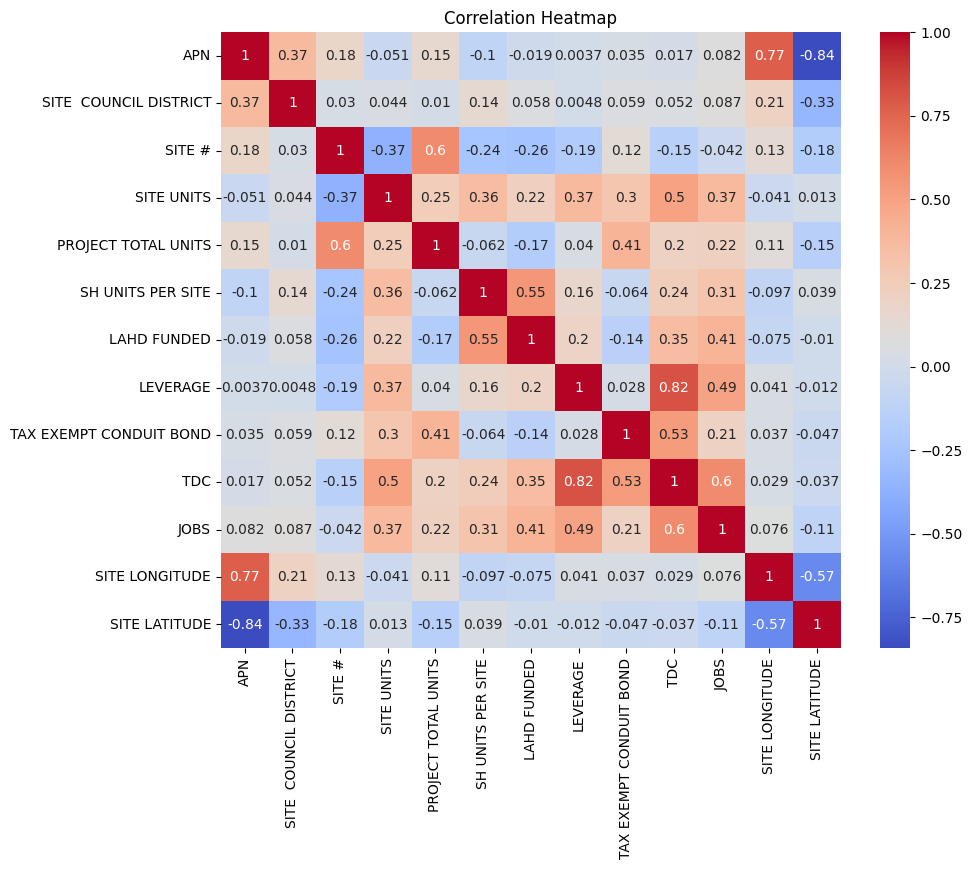

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with actual column names after inspecting your dataset
numeric_column = 'PROJECT TOTAL UNITS'  # e.g., 'Project_Cost'
categorical_column = 'CONSTRUCTION TYPE'  # e.g., 'Project_Type'

# Plot the distribution of a numerical column (histogram)
plt.figure(figsize=(10, 6))
housing_data[numeric_column].hist(bins=20)
plt.title(f'Distribution of {numeric_column}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#Countplot for a categorical column
plt.figure(figsize=(10, 6))
sns.countplot(data=housing_data, x=categorical_column)
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap for numerical columns
# Select only numeric columns
numeric_data = housing_data.select_dtypes(include=['number'])

# Check if there are valid numeric columns to correlate
if not numeric_data.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation.")


In [ ]:
# Summarizing restaurant data by ZIP code
restaurant_summary = restaurant_data.groupby('facility_zip').agg(
    average_score=('score', 'mean'),
    median_score=('score', 'median'),
    min_score=('score', 'min'),
    max_score=('score', 'max'),
    count=('facility_name', 'count')
).reset_index()

# Display the summaries
print(restaurant_summary.head())

  facility_zip  average_score  median_score  min_score  max_score  count
0        90001      93.853408          94.0         71        100   1071
1   90001-1002      92.400000          91.0         90         97      5
2   90001-1127      95.125000          95.0         91        100     16
3   90001-1129      90.000000          90.0         90         90      2
4   90001-1222      91.333333          91.0         90         93      3


In [ ]:
# Summarizing housing data by ZIP code
housing_summary = housing_data.groupby('SITE ADDRESS').agg(
    total_units=('PROJECT TOTAL UNITS', 'sum'),
    min_units=('PROJECT TOTAL UNITS', 'min'),
    max_units=('PROJECT TOTAL UNITS', 'max'),
    count=('NAME', 'count')
).reset_index()

# Display the summaries
print(housing_summary.head())

                                 SITE ADDRESS  total_units  min_units  \
0      100 S BOYLE AVE  Los Angeles, CA 90033           44         44   
1      100 S GRAND AVE  Los Angeles, CA 90012          323        323   
2   100 S SANTA FE AVE  Los Angeles, CA 90012          438        438   
3     10006 S BROADWAY  Los Angeles, CA 90003           16         16   
4  1006 E 28TH ST 1-49  Los Angeles, CA 90011           49         49   

   max_units  count  
0         44      1  
1        323      1  
2        438      1  
3         16      1  
4         49      1  


#d. Join the files using SQL by ZIP code

In [ ]:
housing_summary['ZIP_CODE'] = housing_summary['SITE ADDRESS'].str.extract(r'(\d{5})')

In [ ]:
# Ensure 'facility_zip' is a string
restaurant_summary['facility_zip'] = restaurant_summary['facility_zip'].astype(str)

# Merge the DataFrames
merged_data = restaurant_summary.merge(housing_summary, left_on='facility_zip', right_on='ZIP_CODE', how='inner')

# Display the merged data
print(merged_data.head())

  facility_zip  average_score  median_score  min_score  max_score  count_x  \
0        90002      94.892562          95.5         72        100      242   
1        90002      94.892562          95.5         72        100      242   
2        90002      94.892562          95.5         72        100      242   
3        90002      94.892562          95.5         72        100      242   
4        90002      94.892562          95.5         72        100      242   

                             SITE ADDRESS  total_units  min_units  max_units  \
0  1206 E 105TH ST  Los Angeles, CA 90002          257        257        257   
1   2020 E 97TH ST  LOS ANGELES, CA 90002          135        135        135   
2   2062 E 99TH PL  Los Angeles, CA 90002           80         80         80   
3  2101 E 101ST ST  Los Angeles, CA 90002           92         92         92   
4                 2299 E 99TH PL CA 90002           76         76         76   

   count_y ZIP_CODE  
0        1    90002  
1     

#e. Formulate and test the hypothesis

In [ ]:
# Formulate and test the hypothesis regarding the relationship between affordable housing projects and health inspection scores.
# Alternative Hypothesis: "Higher average health inspection scores are associated with a greater number of affordable housing projects in a ZIP code."
# Null Hypothesis: "There is no relationship between average health inspection scores and the number of affordable housing projects in a ZIP code."

# Selecting an appropriate test: We will use Pearson correlation for this hypothesis.
from scipy.stats import pearsonr

# Extracting relevant predictor and predicted variables.
x = merged_data['total_units']
y = merged_data['average_score']

# Performing the Pearson correlation test.
correlation_coefficient, p_value = pearsonr(x, y)

# Setting a significance level.
alpha = 0.05
reject_null = p_value < alpha

# Return results for interpretation.
correlation_coefficient, p_value, reject_null

(-0.03592224877255573, 0.0006153397910157056, True)

SUMMERY:


Data Loading: Two datasets were loaded from URLs:

Restaurant Health Inspections: Contains inspection scores, grades, dates, etc.
Affordable Housing Projects: Contains information on housing units and project sites.
Exploratory Data Analysis (EDA):

Restaurant Dataset:
Data types were checked and the activity_date was converted to DateTime.
Missing values were identified and handled by imputing or filling them with logical values (e.g., grades filled based on scores).
Visualization of distributions, grades, and inspection counts over time using histograms, countplots, and bar plots.
Housing Dataset:
Missing values were handled by filling numeric columns with the mean and categorical columns with the mode.
Boxplots were used to identify outliers, while countplots and histograms visualized the distribution of key attributes.
A correlation heatmap provided insights into relationships between numeric features.
Data Summarization:

Restaurant Summary: Grouped by ZIP code to calculate the average, median, min, and max scores, as well as the total number of inspections.
Housing Summary: Grouped by site address to calculate the total, min, and max number of housing units.
Merging Datasets:

The datasets were merged on ZIP code to analyze common geographic areas.
Hypothesis Formulation and Testing:

Hypothesis: Tested if there was a relationship between affordable housing projects and restaurant health inspection scores.
Pearson Correlation: Calculated the correlation coefficient and p-value between the number of housing units and the average health inspection score. The test evaluated whether there was a statistically significant relationship.



---



---



---



---



---



#2.Find some interesting data from Indian government data portal https://www.data.gov.in and perform EDA, derive some insights using graphs, and perform a statistical test for an interesting hypothesis. No need to use multiple files for this question, unless you want to do the extra work for your own learning.

###DATA COLLECTED : Crimes Against Women in India
https://www.kaggle.com/datasets/balajivaraprasad/crimes-against-women-in-india-2001-2021
About Dataset
###Crimes against women in India from 2001 to 2021
#This data is collated from https://data.gov.in. It has state-wise data on the various crimes committed against women between 2001 to 2021. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/CrimesOnWomenData.csv')


In [ ]:
df.head()

Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
## Checking the data
df.sample(4)

State  Year  Rape   K&A   DD   AoW  AoM    DV   WT
227  TAMIL NADU  2007   523  1097  208  1540  875  1976    0
339  PUDUCHERRY  2010     3    14    1    46   22     7    0
686      Sikkim  2020   389   633   40   892   31   689  231
589    Delhi UT  2017  1229  3783  120  2874  619  2735    6

In [ ]:
df_des = pd.read_csv('/content/description.csv')

In [ ]:
## Checking the description of the columns
df_des

Unnamed: 0 Column Names                       Explanation
0           0        State                             State
1           1         Year                              Year
2           2         Rape                 No. of Rape cases
3           3          K&A                Kidnap And Assault
4           4           DD                      Dowry Deaths
5           5          AoW             Assault against women
6           6          AoM  Assault against modesty of women
7           7           DV                 Domestic violence
8           8           WT                 Women Trafficking

In [ ]:
df_des.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

#Checking the shape of the dataset

In [ ]:
df.shape

(736, 9)

Observations:
There are 736 rows and 9 Columns in this Dataset

Checking the Missing values in the DataFrame

In [ ]:
df.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

Observations:
There are no missing values in the Dataset

In [ ]:
df["State"].value_counts()

State
Arunachal Pradesh    11
Karnataka            11
Mizoram              11
Meghalaya            11
Manipur              11
Maharashtra          11
Madhya Pradesh       11
Kerala               11
Jharkhand            11
Assam                11
Jammu & Kashmir      11
Himachal Pradesh     11
Haryana              11
Gujarat              11
Goa                  11
Chhattisgarh         11
Nagaland             11
Odisha               11
Punjab               11
Rajasthan            11
Sikkim               11
Tamil Nadu           11
Telangana            11
Tripura              11
Uttar Pradesh        11
Uttarakhand          11
West Bengal          11
A & N Islands        11
Chandigarh           11
D&N Haveli           11
Daman & Diu          11
Delhi UT             11
Lakshadweep          11
Bihar                11
Puducherry           11
Andhra Pradesh       11
MIZORAM              10
MEGHALAYA            10
MANIPUR              10
MAHARASHTRA          10
MADHYA PRADESH       10
KERALA               10
KARNATAKA            10
JHARKHAND            10
ARUNACHAL PRADESH    10
HIMACHAL PRADESH     10
HARYANA              10
GUJARAT              10
GOA                  10
CHHATTISGARH         10
BIHAR                10
ASSAM                10
JAMMU & KASHMIR      10
NAGALAND             10
ODISHA               10
PUNJAB               10
RAJASTHAN            10
SIKKIM               10
TAMIL NADU           10
TRIPURA              10
UTTAR PRADESH        10
UTTARAKHAND          10
WEST BENGAL          10
A & N ISLANDS        10
CHANDIGARH           10
D & N HAVELI         10
DAMAN & DIU          10
LAKSHADWEEP          10
PUDUCHERRY           10
ANDHRA PRADESH       10
Name: count, dtype: int64

In [ ]:
# Create a dictionary for column renaming
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}

# Rename columns in the dataset
df.rename(columns=column_names, inplace=True)

# Check the renamed columns
print("\nRenamed Columns:")
print(df.columns)



Renamed Columns:
Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')


#Checking the info of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               736 non-null    object
 1   Year                736 non-null    int64 
 2   Rape Cases          736 non-null    int64 
 3   Kidnap and Assault  736 non-null    int64 
 4   Dowry Deaths        736 non-null    int64 
 5   Assault on Women    736 non-null    int64 
 6   Assault on Minors   736 non-null    int64 
 7   Domestic Violence   736 non-null    int64 
 8   Witchcraft          736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


Observations:
Only State Column has Object Datatype and all other 8 columns are int

#Checking the Descriptive Statistics

In [ ]:
df.describe()

Year   Rape Cases  Kidnap and Assault  Dowry Deaths  \
count   736.000000   736.000000          736.000000    736.000000   
mean   2011.149457   727.855978         1134.542120    215.692935   
std       6.053453   977.024945         1993.536828    424.927334   
min    2001.000000     0.000000            0.000000      0.000000   
25%    2006.000000    35.000000           24.750000      1.000000   
50%    2011.000000   348.500000          290.000000     29.000000   
75%    2016.000000  1069.000000         1216.000000    259.000000   
max    2021.000000  6337.000000        15381.000000   2524.000000   

       Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  
count        736.000000         736.000000         736.000000  736.000000  
mean        1579.115489         332.722826        2595.078804   28.744565  
std         2463.962518         806.024551        4042.004953   79.999660  
min            0.000000           0.000000           0.000000    0.000000  
25%           34.000000           3.000000          13.000000    0.000000  
50%          387.500000          31.000000         678.500000    0.000000  
75%         2122.250000         277.500000        3545.000000   15.000000  
max        14853.000000        9422.000000       23278.000000  549.000000

In [ ]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("icefire", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

#Exploratory Data Analysis

In [ ]:
### Checking the unique values in the State Column
df['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli',
  

In [ ]:
df['State'].nunique()

70

Observations:
There are 70 Unique values in the State Column

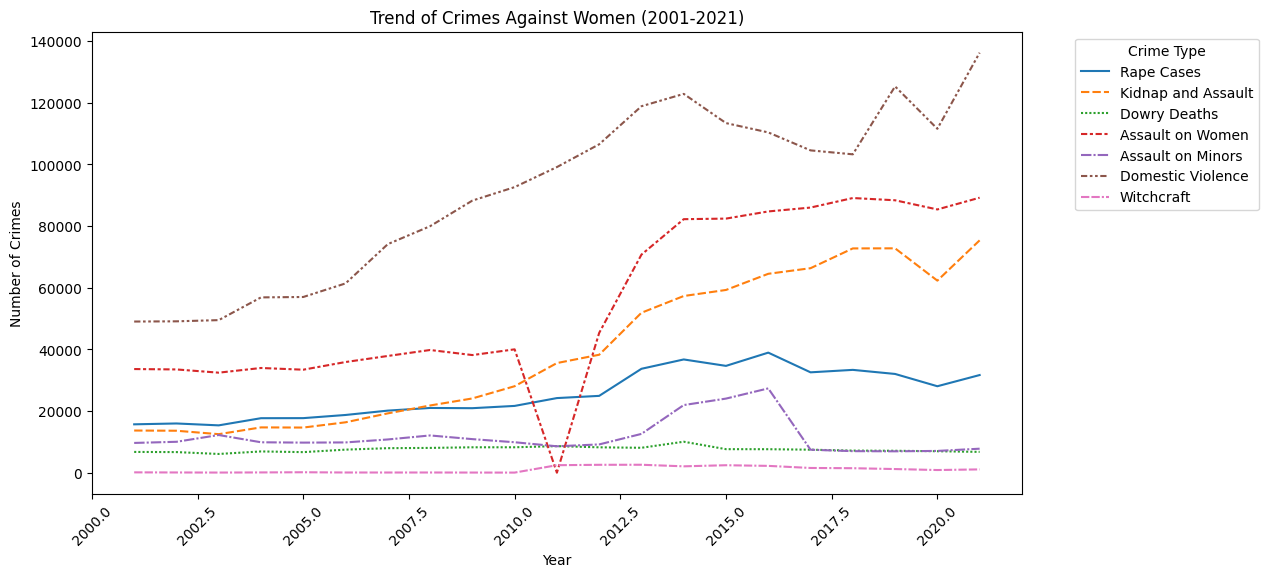

In [ ]:
# Group by year and sum up all crime types
crime_trend = df.groupby('Year').sum()

# Plotting the trend of different crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Trend of Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations:
From the figure above it is clear that Domestic Violence in Increasing every Year.

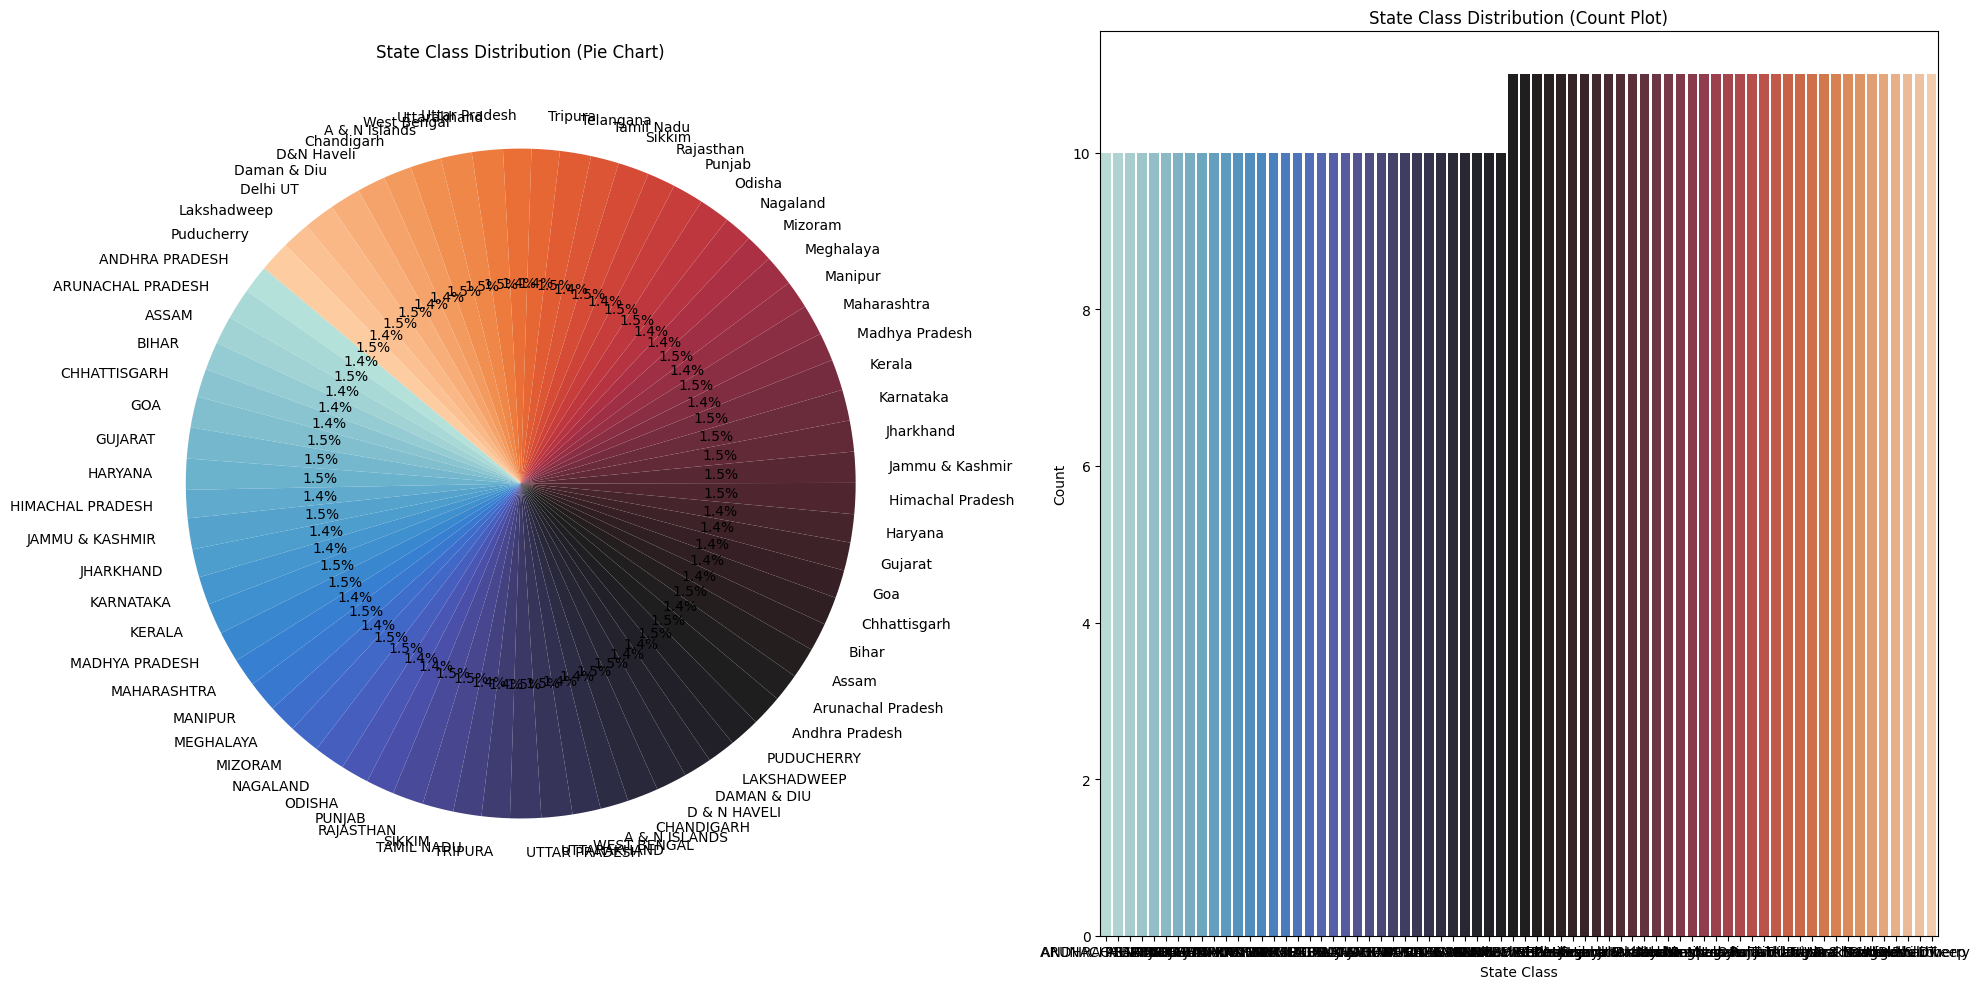

In [ ]:
state_counts = df['State'].value_counts().sort_index()

palette = sns.color_palette("icefire", n_colors=len(state_counts))
labels = df['State'].unique()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.pie(state_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('State Class Distribution (Pie Chart)')
sns.countplot(x='State', data=df, ax=ax2, palette=palette)
ax2.set_title('State Class Distribution (Count Plot)')
ax2.set_xlabel('State Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(labels)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

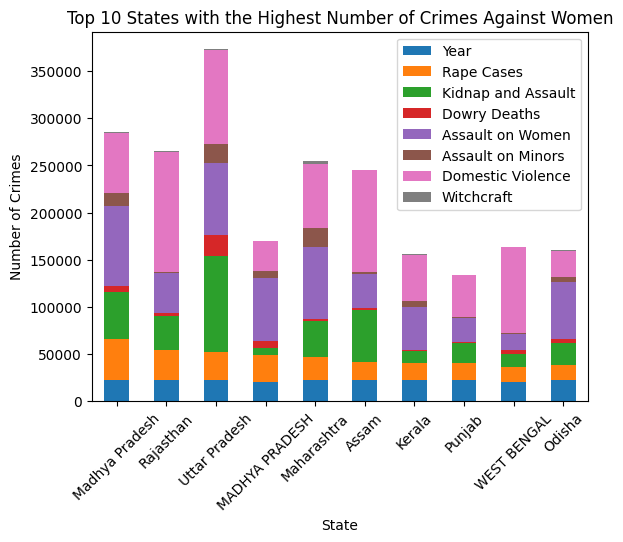

In [ ]:
# Total crimes by state
state_crime = df.groupby('State').sum().sort_values(by='Rape Cases', ascending=False)

# Top 10 states with the highest number of crimes
top_states = state_crime.head(10)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 States with the Highest Number of Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

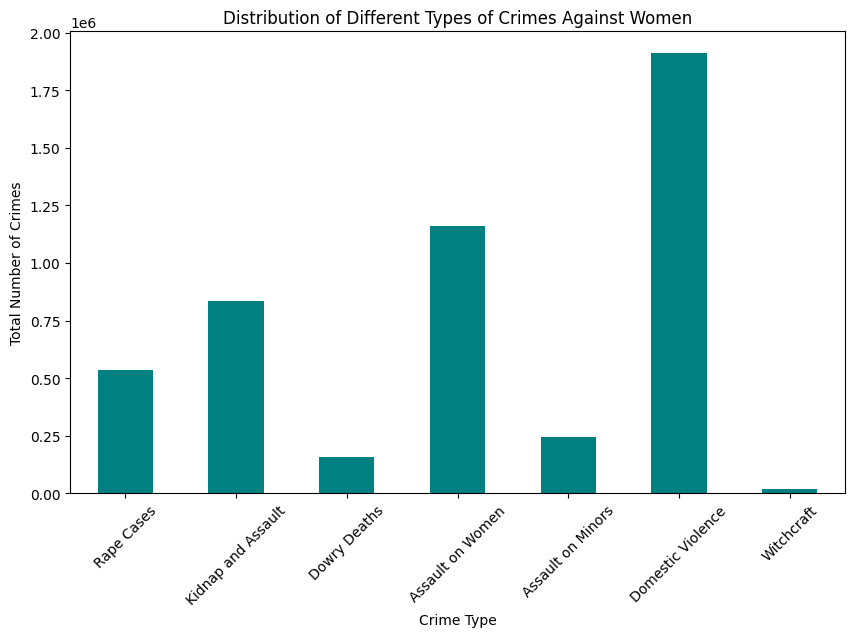

In [ ]:
# Sum up all crimes to get a sense of distribution
crime_distribution = df.drop(['State', 'Year'], axis=1).sum()

plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of Different Types of Crimes Against Women')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()

Observations:
Domestic Violence and Assault on Women has high number of Crimes

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the features for which scatter plots will be created
features = ['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
            'Assault on Women', 'Assault on Minors', 'Domestic Violence',
            'Witchcraft']

# Create the subplots layout
fig = make_subplots(rows=3, cols=3, subplot_titles=features)

# Add scatter plots to each subplot
for i, feature in enumerate(features):
    row = i // 3 + 1
    col = i % 3 + 1

    # Generate scatter plot for each feature
    scatter_plot = px.scatter(df, x='Year', y=feature)

    # Add the scatter plot data to the subplot
    for trace in scatter_plot.data:
        fig.add_trace(trace, row=row, col=col)

# Update the layout of the figure
fig.update_layout(height=800, width=900, title_text="Crime Statistics Over Years by Feature")

# Show the figure
fig.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode the "State" column
df["State"] = label_encoder.fit_transform(df["State"])

In [ ]:
df.head()

State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
0      2  2001         871                 765           420   
1      3  2001          33                  55             0   
2      4  2001         817                1070            59   
3      8  2001         888                 518           859   
4     11  2001         959                 171            70   

   Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  \
0              3544               2271               5791           7   
1                78                  3                 11           0   
2               850                  4               1248           0   
3               562                 21               1558          83   
4              1763                161                840           0   

   Total Crimes  
0         13669  
1           180  
2          4048  
3          4489  
4          3964

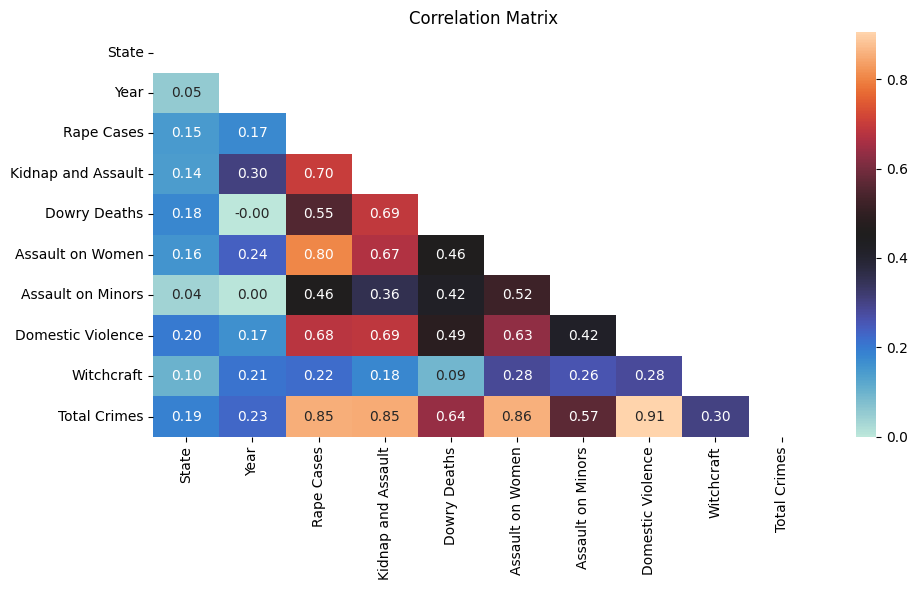

In [ ]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

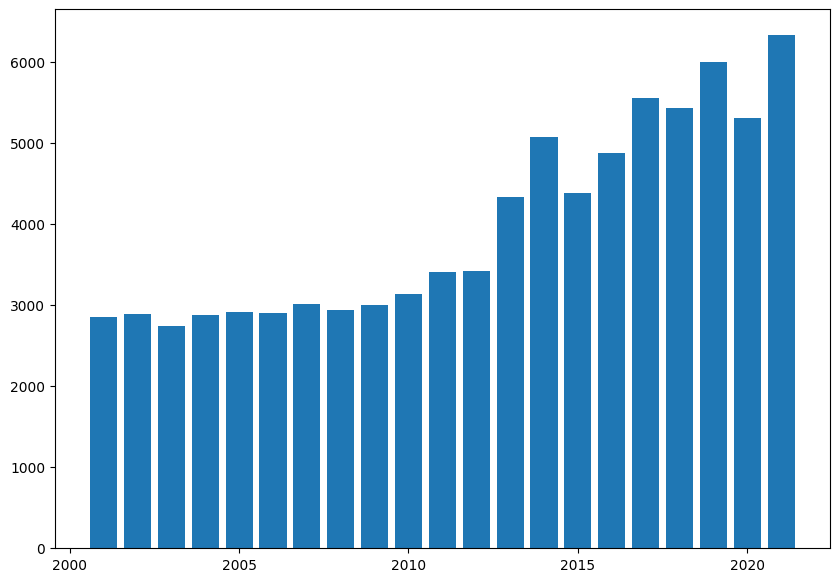

In [ ]:
### Checking the crime rate of Rape Case with respect to year
plt.figure(figsize=(10, 7))
plt.bar(x='Year', data=df, height='Rape Cases')
plt.show()

In [ ]:
cases_in_each_year = df.groupby('Year').sum().sort_values(by='Year', ascending=True)
cases_in_each_year.drop(columns=['State'], axis=1, inplace=True)

In [ ]:
cases_in_each_year

Rape Cases  Kidnap and Assault  Dowry Deaths  Assault on Women  \
Year                                                                   
2001       15694               13681          6738             33622   
2002       15970               13613          6687             33497   
2003       15357               12499          6078             32450   
2004       17682               14697          6900             33966   
2005       17701               14644          6673             33413   
2006       18725               16348          7481             35899   
2007       20139               19249          7955             37866   
2008       21001               21803          8043             39802   
2009       20928               24086          8242             38159   
2010       21665               28055          8248             40012   
2011       24206               35565          8618                 0   
2012       24923               38262          8233             45344   
2013       33707               51881          8083             70739   
2014       36735               57311         10050             82235   
2015       34651               59277          7634             82422   
2016       38947               64519          7621             84746   
2017       32559               66333          7466             86001   
2018       33356               72751          7166             89097   
2019       32033               72780          7115             88367   
2020       28046               62300          6966             85392   
2021       31677               75369          6753             89200   

      Assault on Minors  Domestic Violence  Witchcraft  
Year                                                    
2001               9656              49032         114  
2002              10027              49102          76  
2003              12220              49492          46  
2004               9871              56867          89  
2005               9759              56995         148  
2006               9822              61400          67  
2007              10783              74143          61  
2008              12084              79957          67  
2009              10891              88263          48  
2010               9881              92637          36  
2011               8570              99135        2435  
2012               9173             106527        2563  
2013              12589             118866        2579  
2014              21938             122877        2070  
2015              24041             113403        2424  
2016              27344             110378        2214  
2017               7451             104551        1536  
2018               6992             103272        1459  
2019               6939             125298        1185  
2020               7065             111549         868  
2021               7788             136234        1071

In [ ]:
df['Total Crimes'] = df[['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Assault on Minors', 'Domestic Violence', 'Witchcraft']].sum(axis=1)

In [ ]:
cases_in_each_year['Total Crimes'] = cases_in_each_year[['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Assault on Minors', 'Domestic Violence', 'Witchcraft']].sum(axis=1)

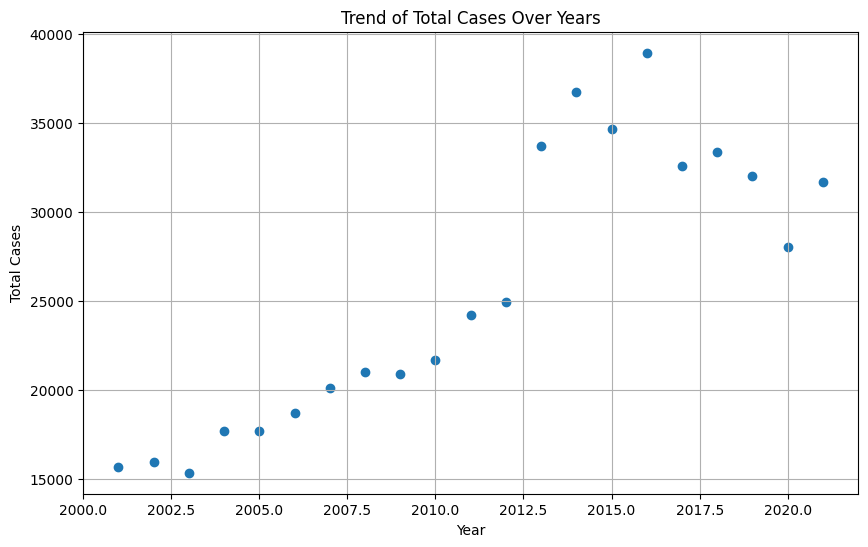

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cases_in_each_year.index, cases_in_each_year['Rape Cases'])
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Trend of Total Cases Over Years')
plt.grid(True)
plt.show()

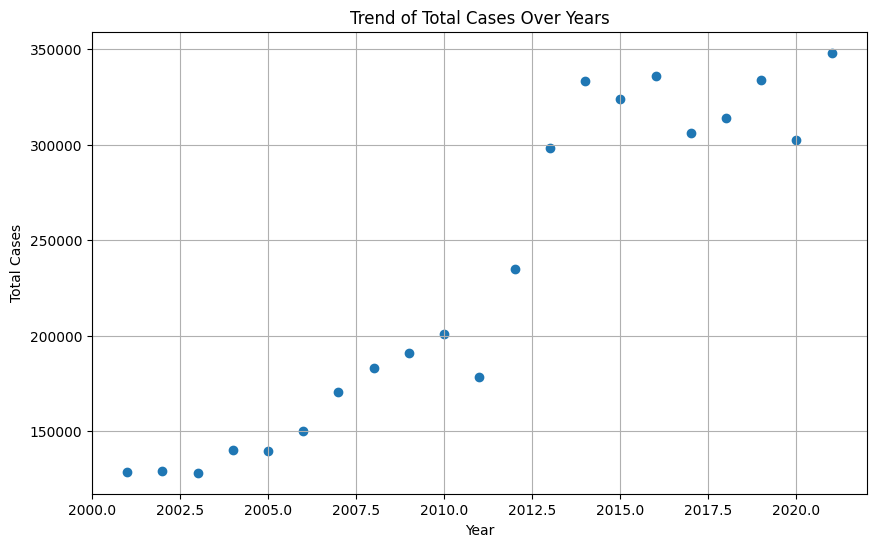

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cases_in_each_year.index, cases_in_each_year['Total Crimes'])
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Trend of Total Cases Over Years')
plt.grid(True)
plt.show()

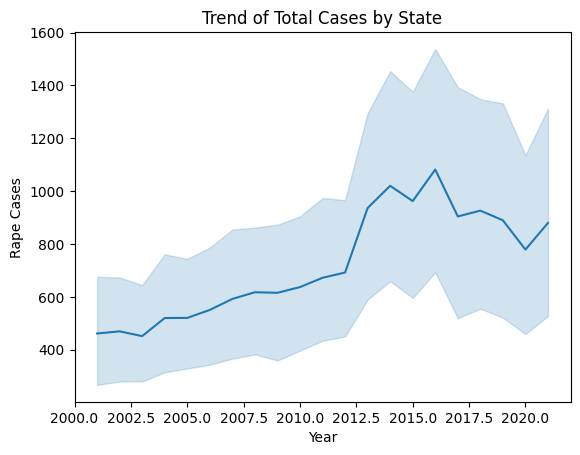

In [ ]:
import seaborn as sns

# Group the data by both `State` and `Year`
cases_by_state_year = df.groupby(['State', 'Year']).sum().reset_index()

# Create a line plot using Seaborn
sns.lineplot(x='Year', y='Rape Cases', data=cases_by_state_year)
plt.title('Trend of Total Cases by State')
plt.show()

In [ ]:
### Set the columns and rows option to max
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Group data by State and Year
grouped_data = df.groupby(['State', 'Year']).sum().reset_index()

# Calculate year-over-year differences
grouped_data['Difference'] = grouped_data.groupby('State')['Total Crimes'].diff()

# Filter for states with consistently increasing crime
increasing_states = grouped_data[grouped_data['Difference'] > 0]

# Print or visualize the results
increasing_states.head(10)
# You can also create a line plot or bar chart to visualize the trends

State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
3   A & N ISLANDS  2004          10                   3             0   
5   A & N ISLANDS  2006           6                   5             0   
6   A & N ISLANDS  2007           3                   9             1   
7   A & N ISLANDS  2008          12                  13             2   
8   A & N ISLANDS  2009          18                  14             1   
11  A & N Islands  2012          12                   7             2   
12  A & N Islands  2013          27                  12             1   
13  A & N Islands  2014          32                  17             0   
14  A & N Islands  2015          36                  21             0   
17  A & N Islands  2018          30                   2             0   

    Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  \
3                  6                  3                  5           0   
5                 14                  4                  7           0   
6                 21                  2                 18           0   
7                 24                  3                 26           0   
8                 30                  7                 21           0   
11                10                  4                  5           2   
12                45                  8                  9           4   
13                41                 18                 14           1   
14                57                 23                 14           0   
17                35                  4                  4           0   

    Total Crimes  Difference  
3             27         5.0  
5             36        14.0  
6             54        18.0  
7             80        26.0  
8             91        11.0  
11            42         6.0  
12           106        64.0  
13           123        17.0  
14           151        28.0  
17            75         5.0

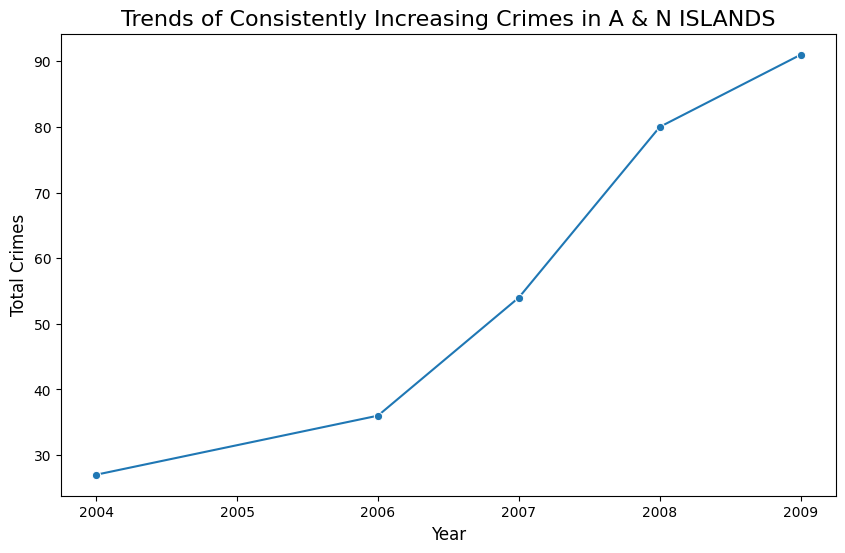

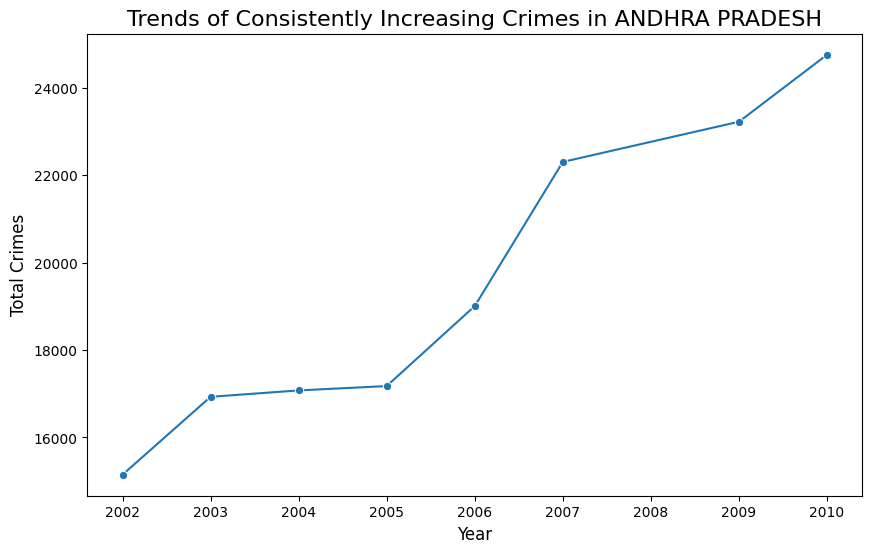

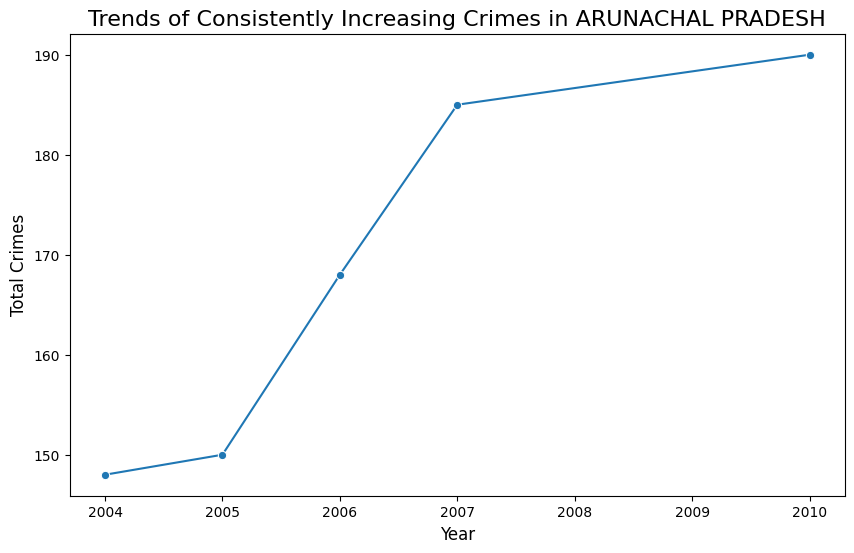

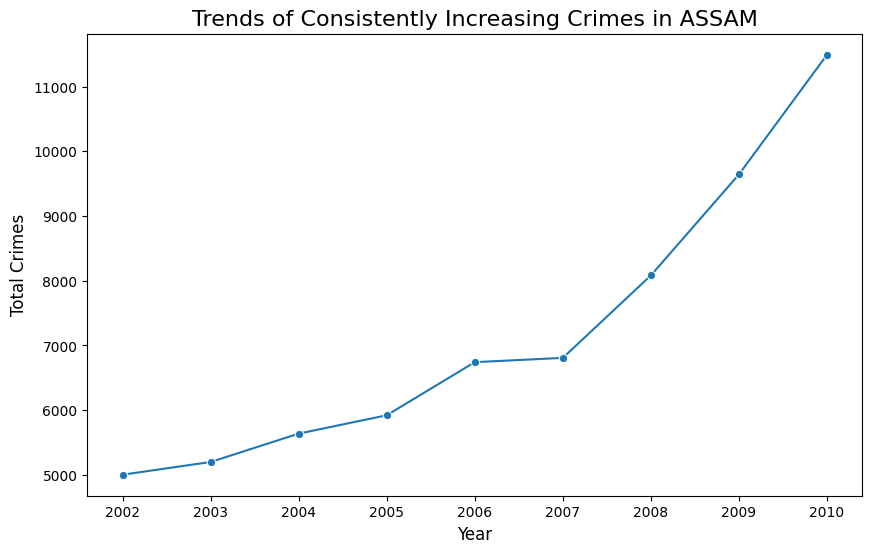

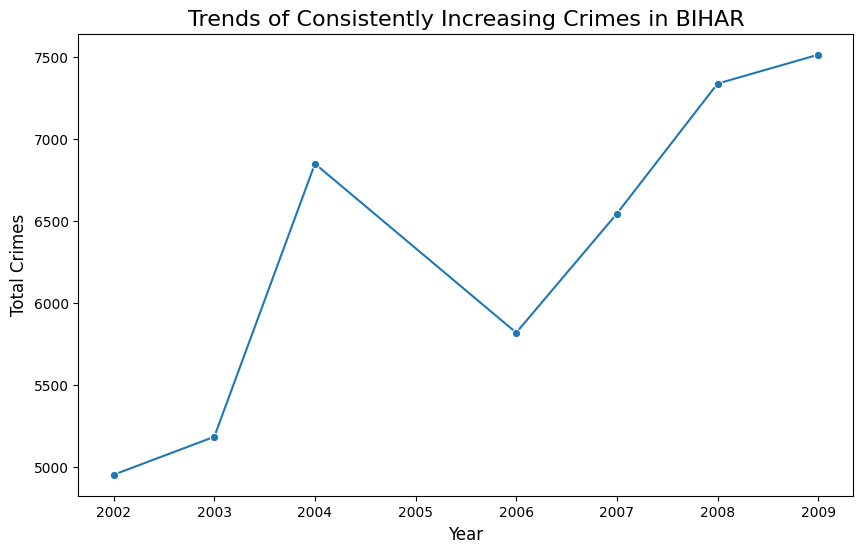

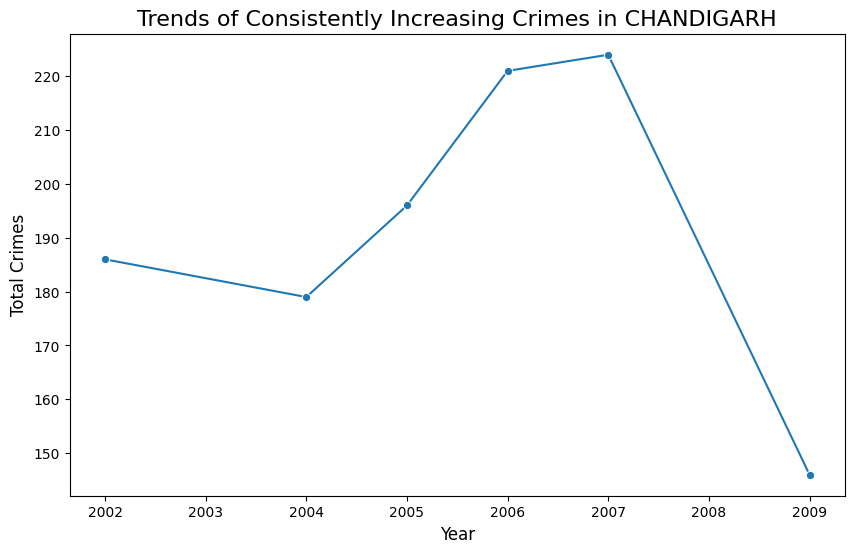

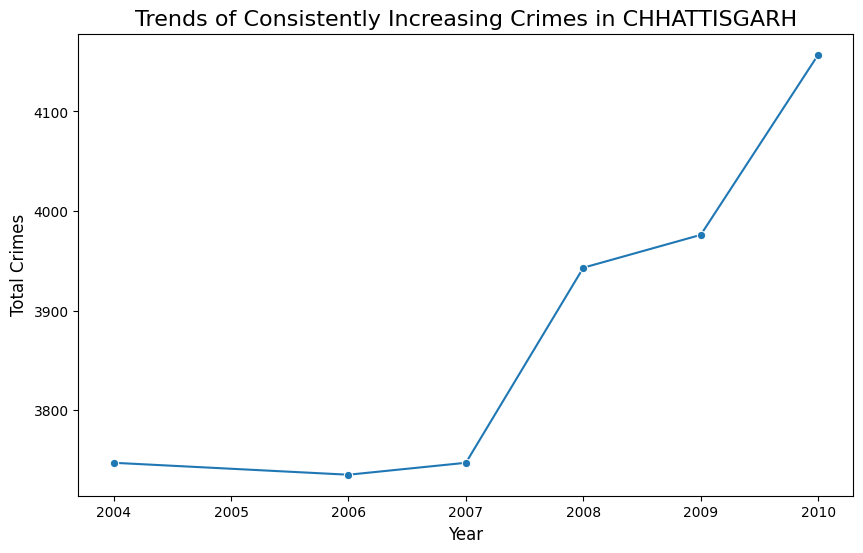

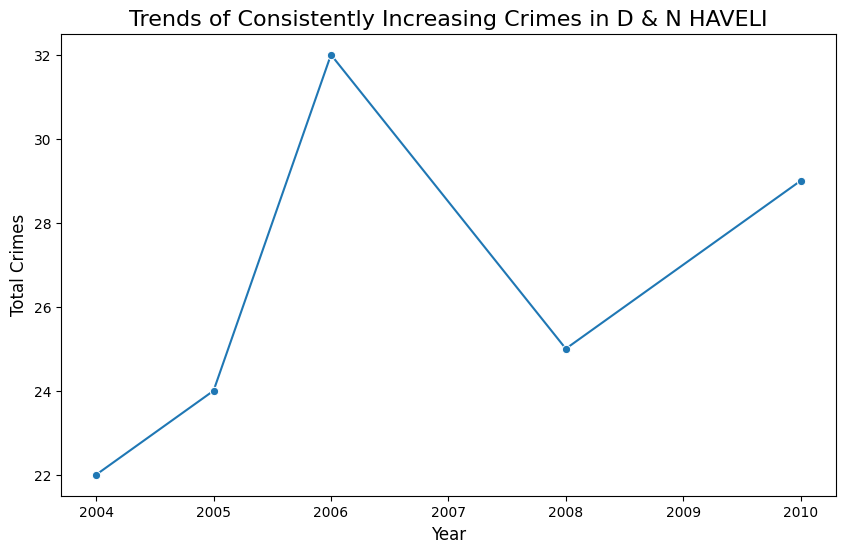

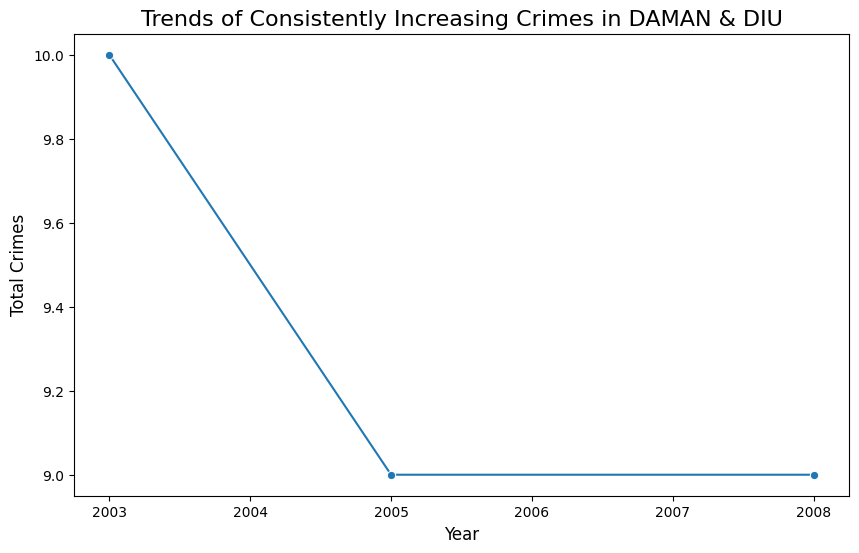

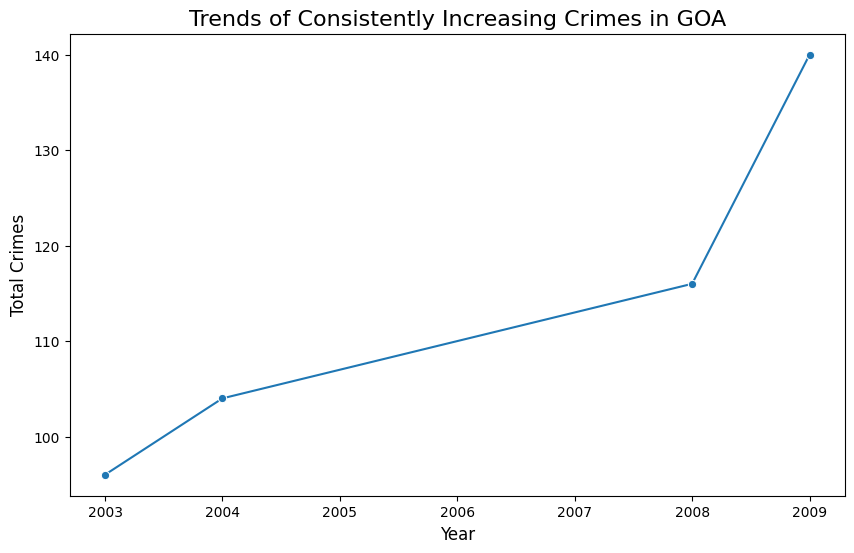

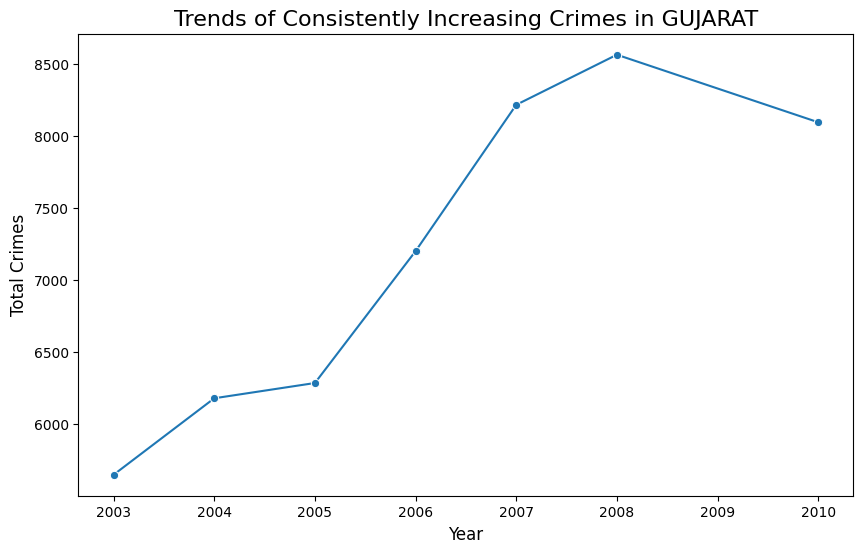

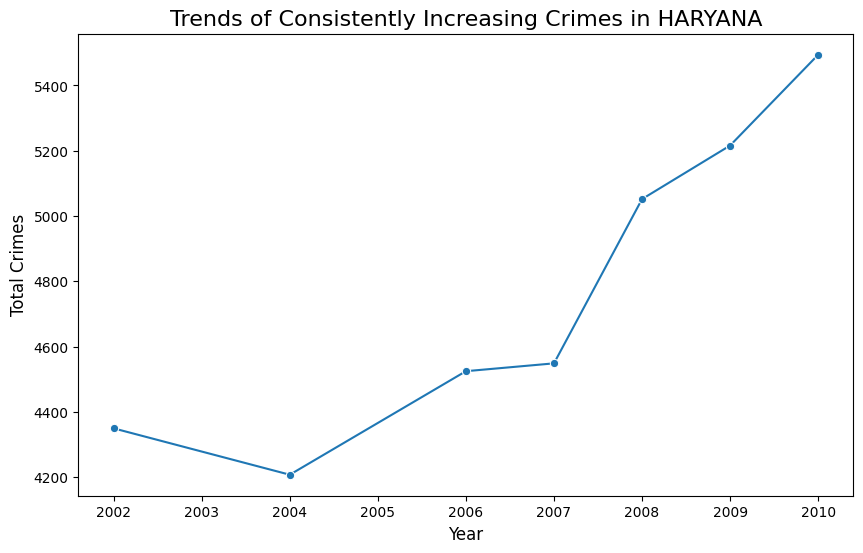

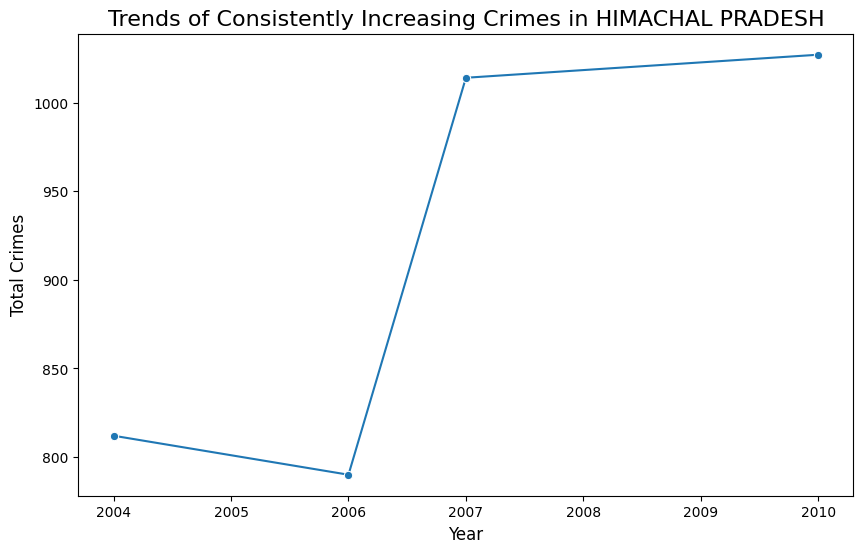

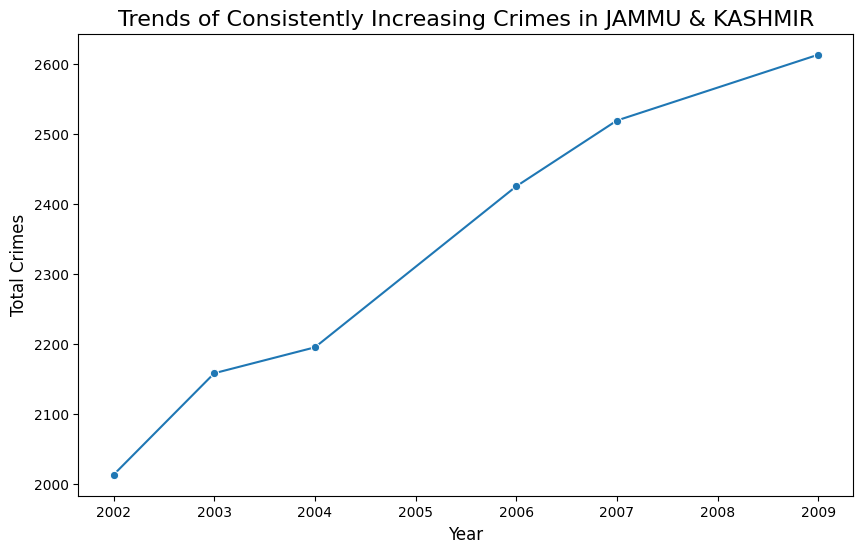

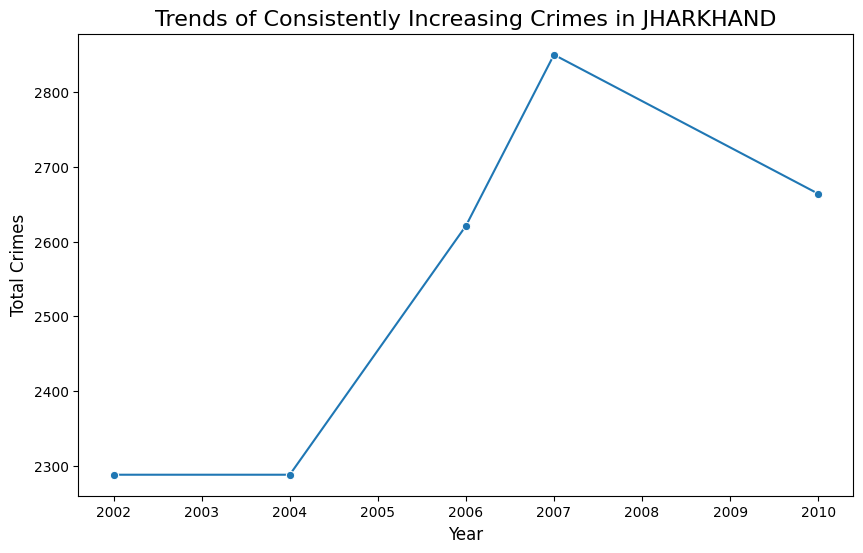

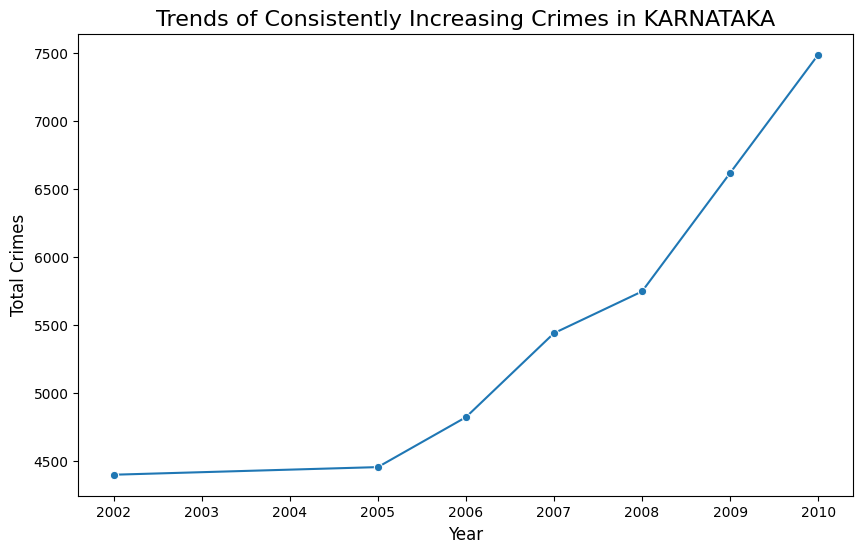

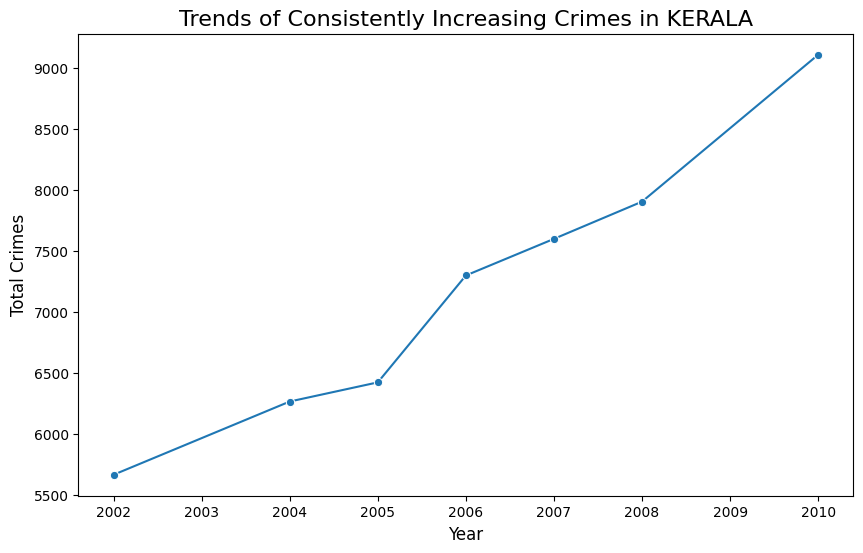

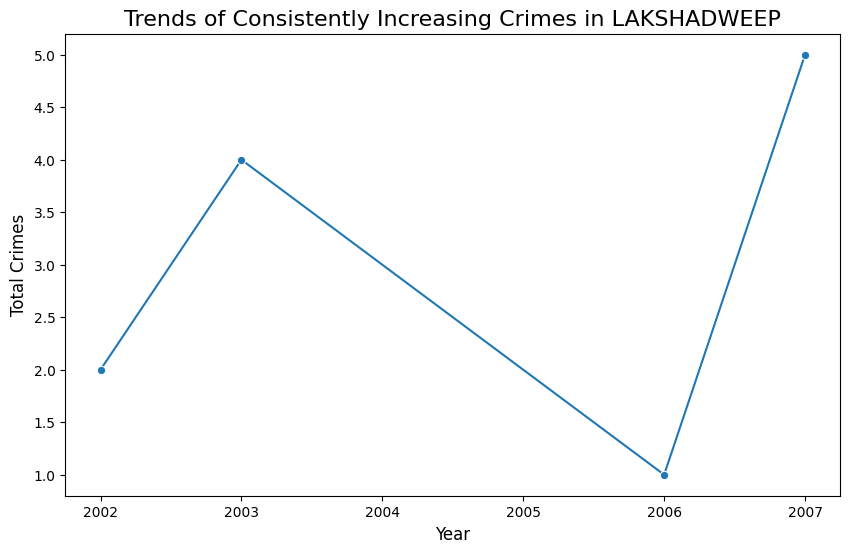

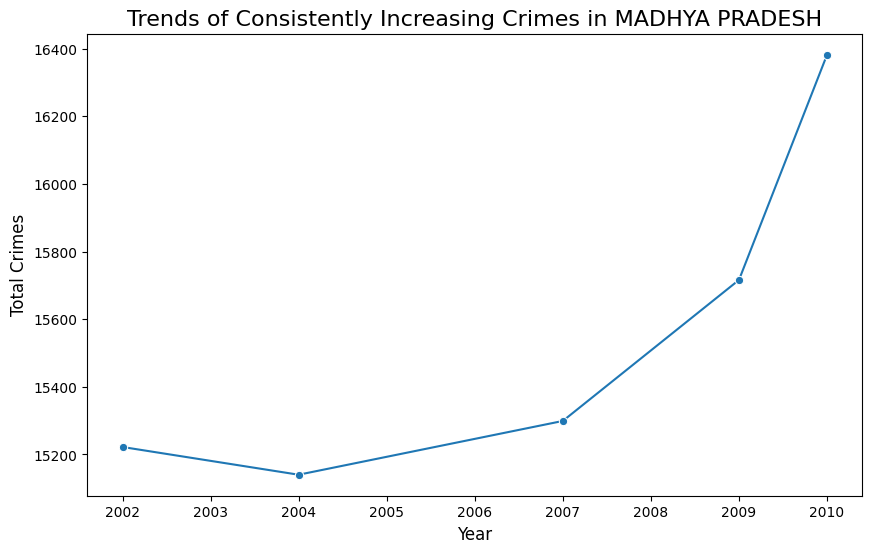

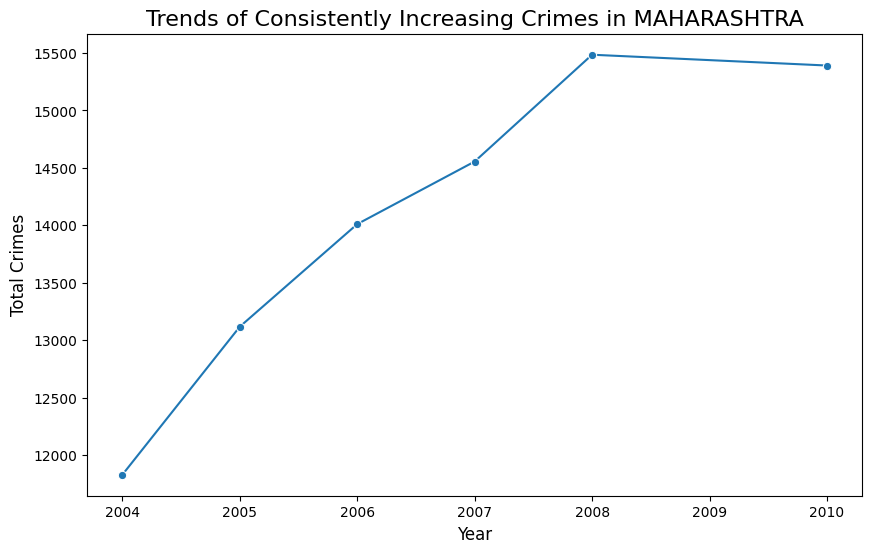

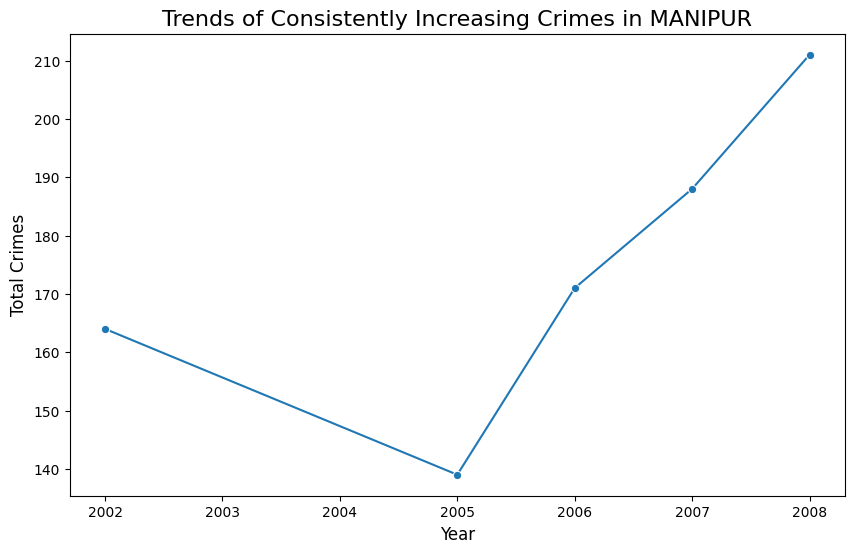

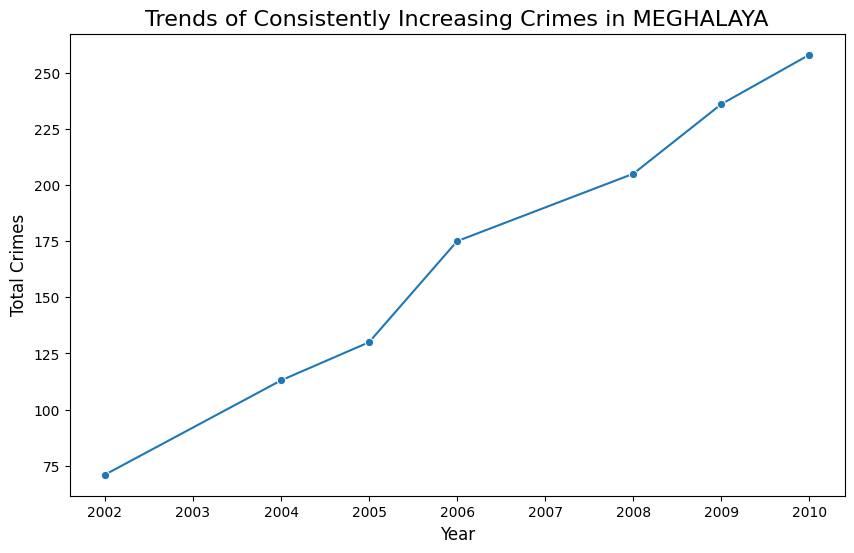

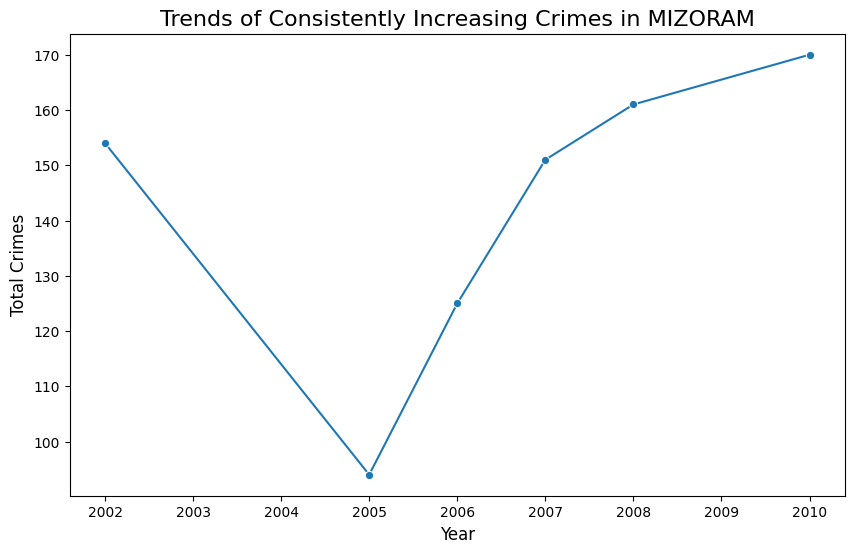

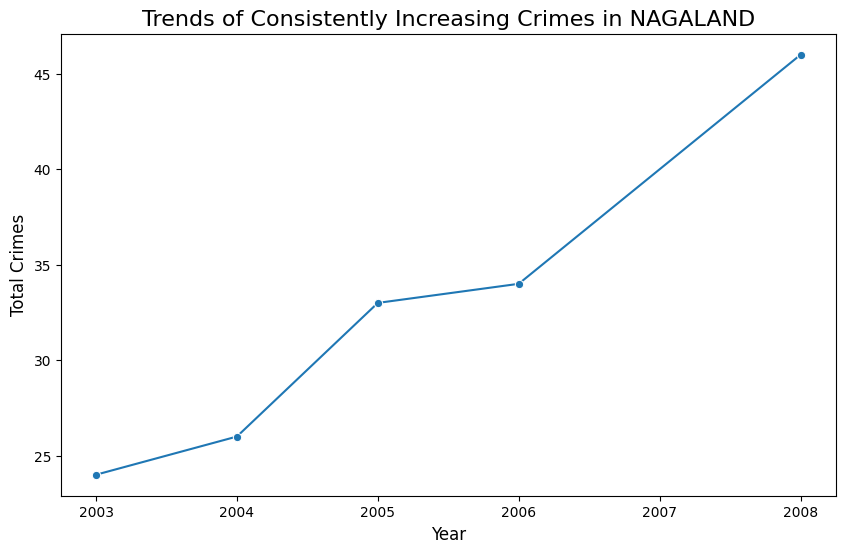

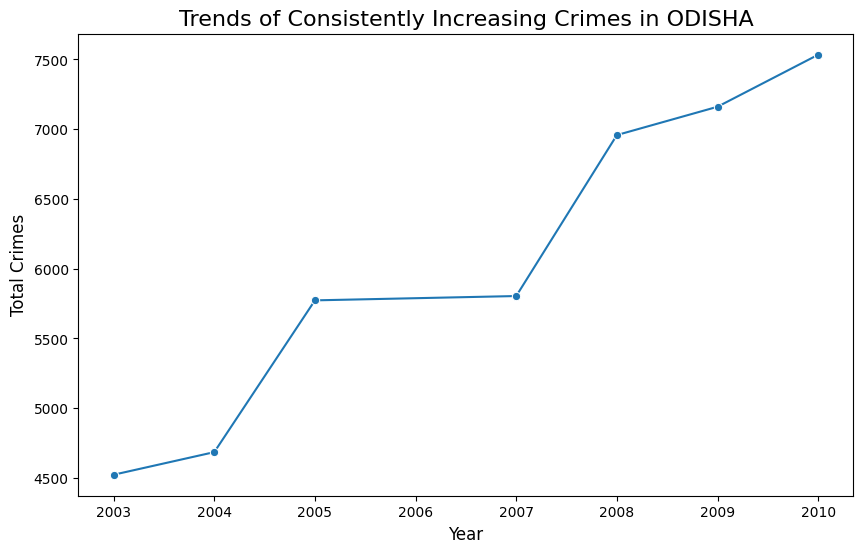

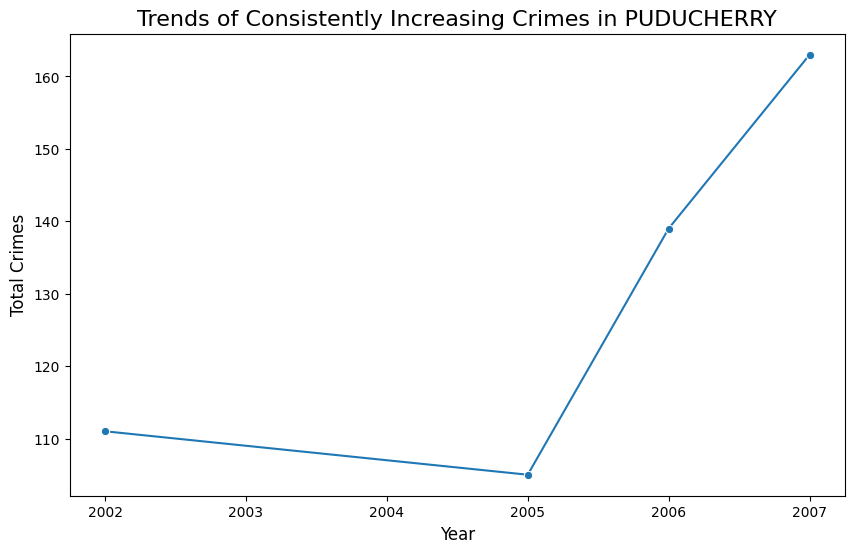

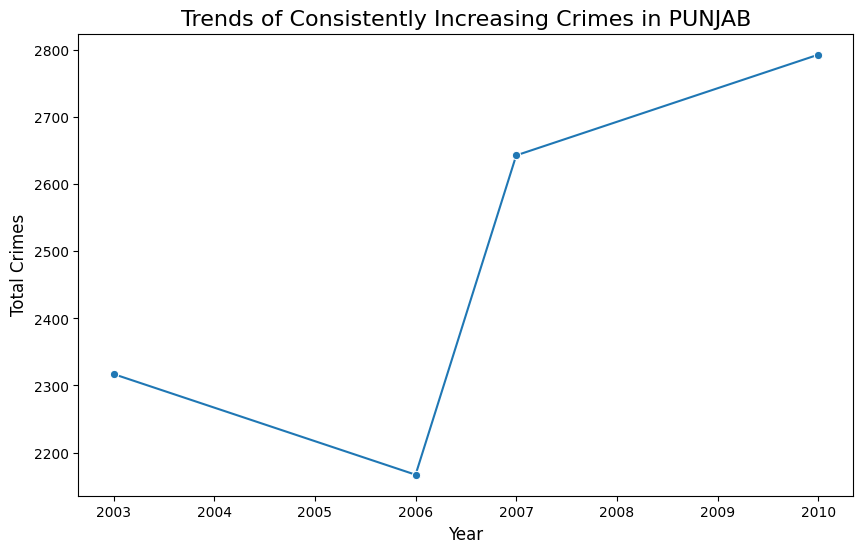

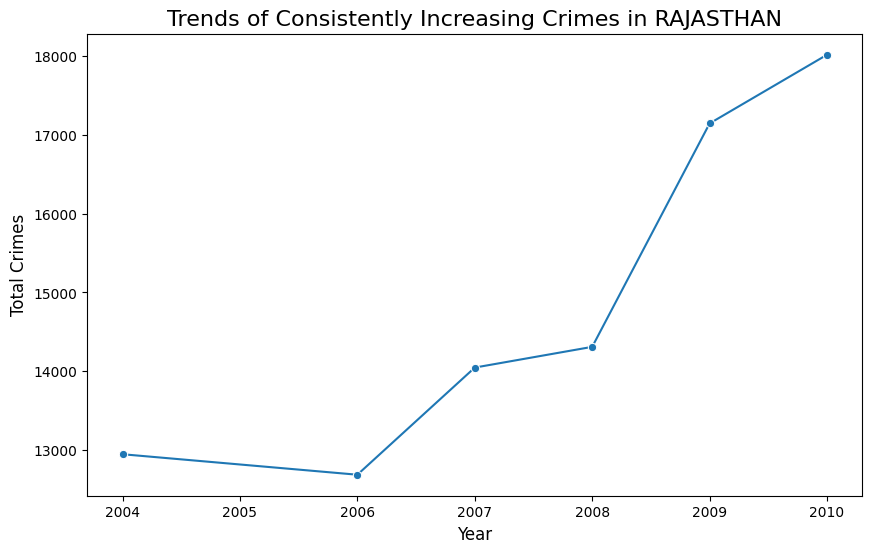

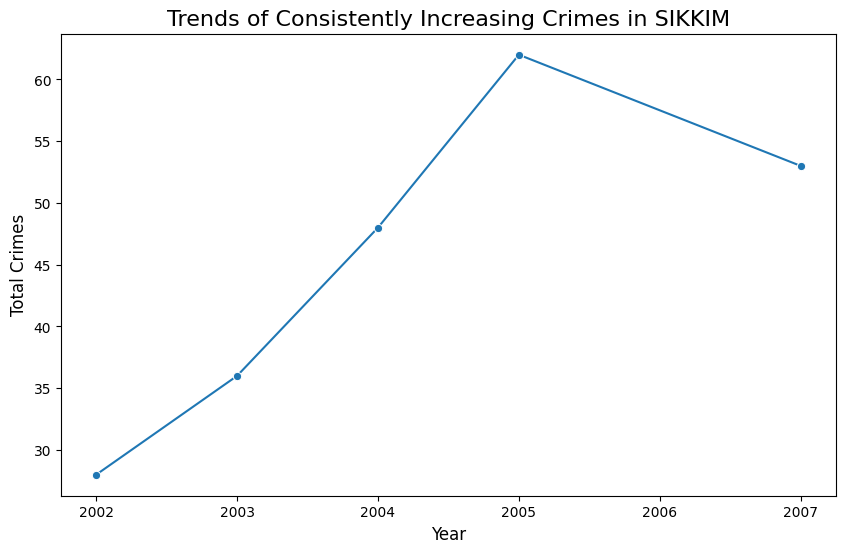

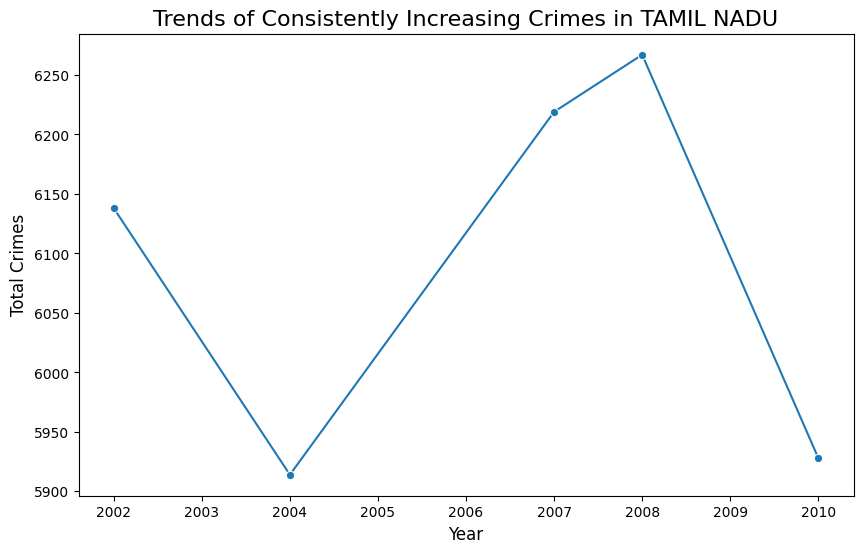

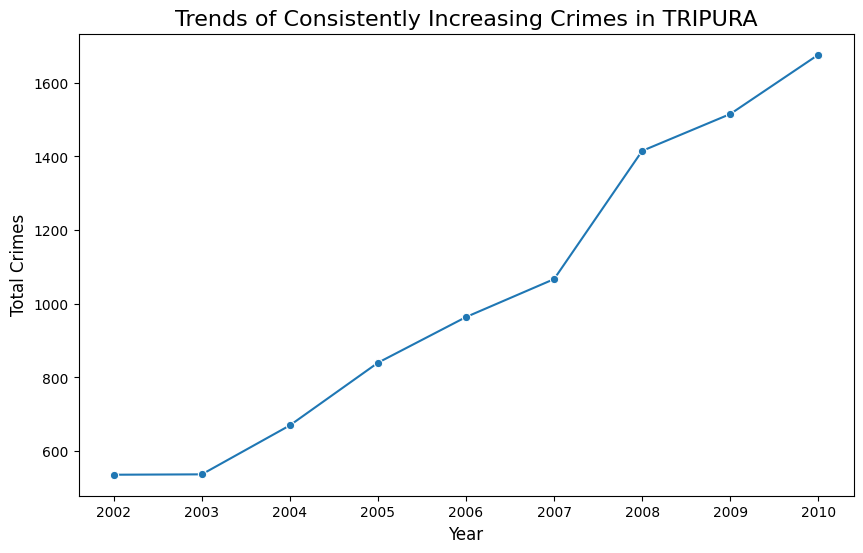

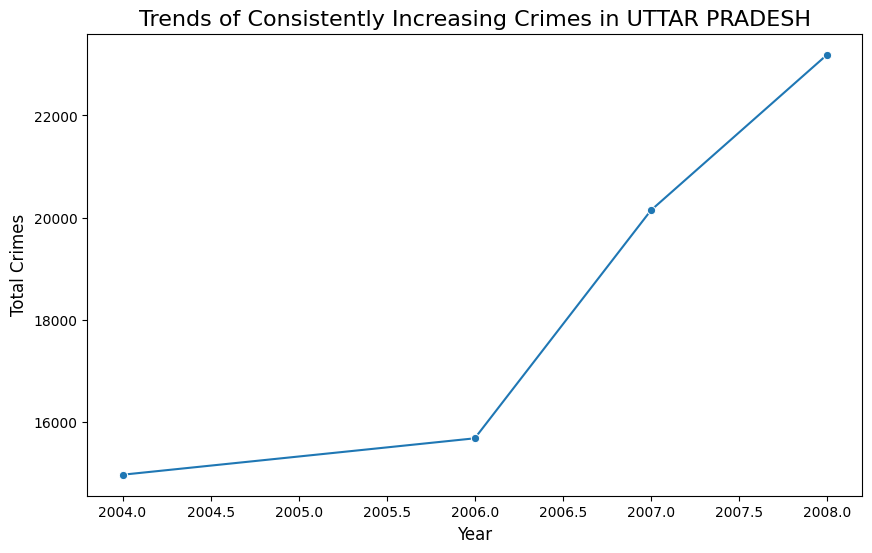

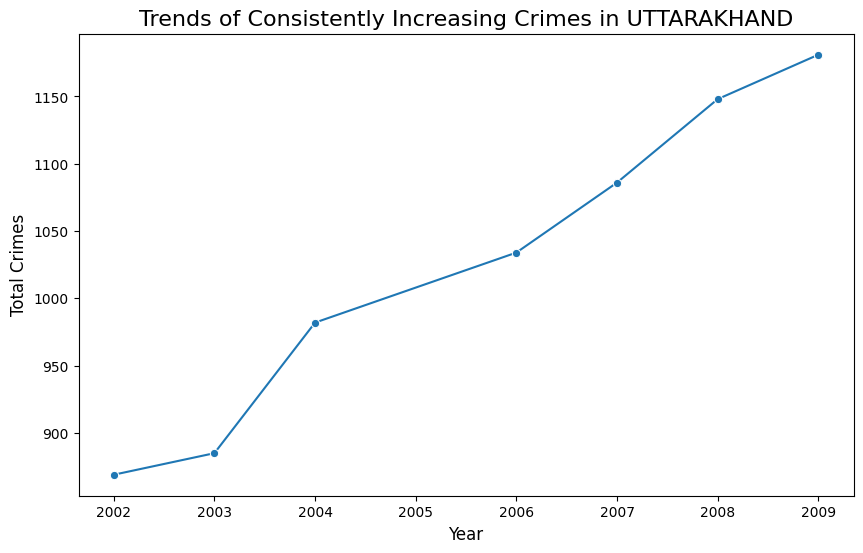

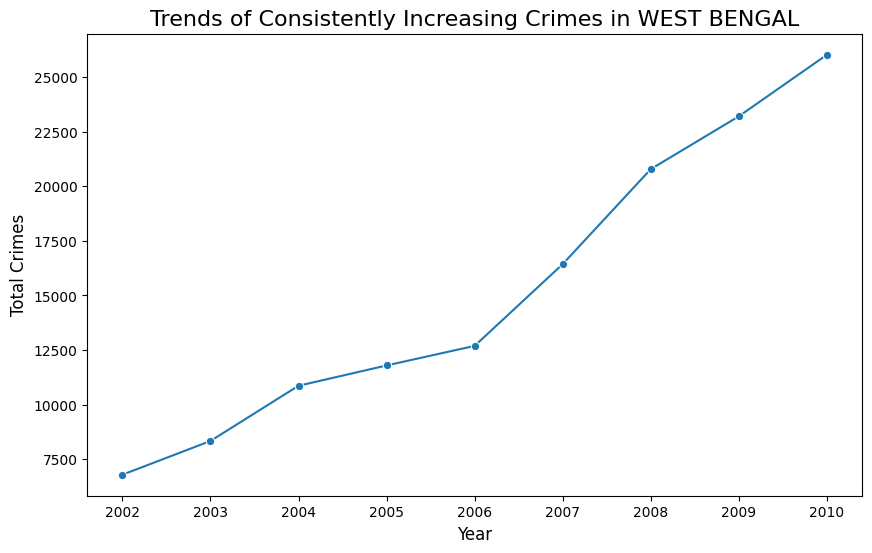

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique states from the increasing_states DataFrame
unique_states = increasing_states['State'].unique()

# Loop over each state and create a separate plot for each
for state in unique_states:
    # Filter data for the current state
    state_data = increasing_states[increasing_states['State'] == state]

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Line plot for the specific state
    sns.lineplot(data=state_data, x='Year', y='Total Crimes', marker='o')

    # Add title and labels
    plt.title(f'Trends of Consistently Increasing Crimes in {state}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Crimes', fontsize=12)

    # Display the plot
    plt.show()


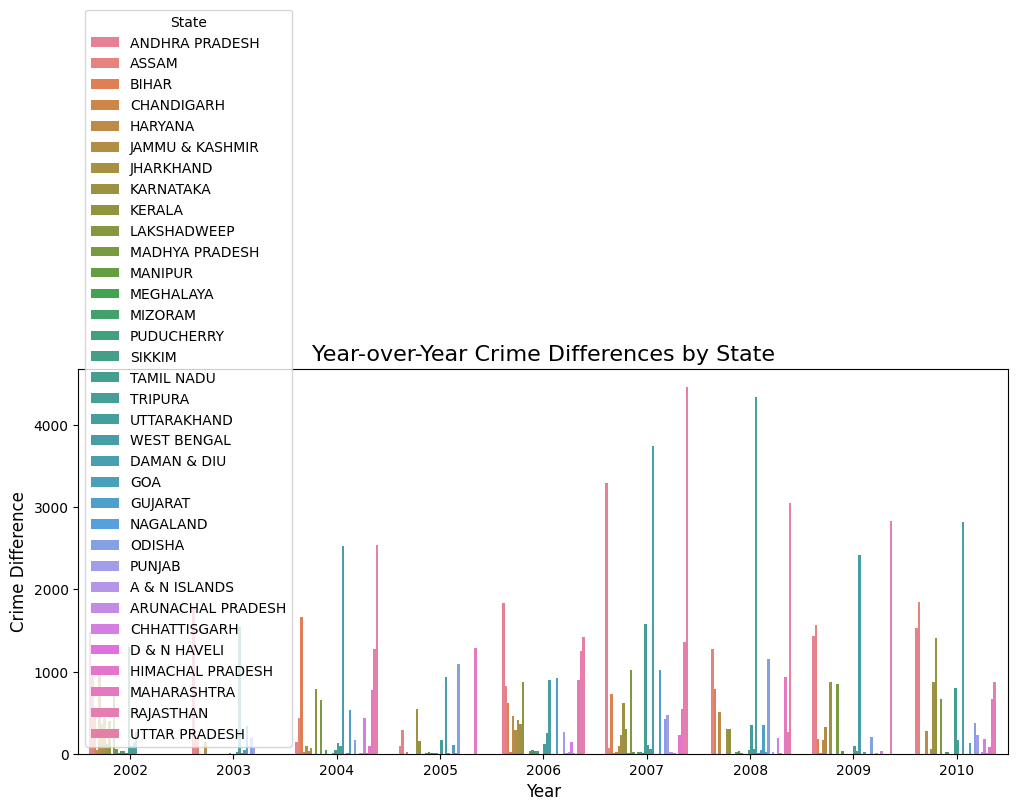

In [ ]:
# Set the figure size
plt.figure(figsize=(12,5))

# Bar chart to show the year-over-year differences for states with consistently increasing crime
sns.barplot(data=increasing_states, x='Year', y='Difference', hue='State')

# Add plot title and labels
plt.title('Year-over-Year Crime Differences by State', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Difference', fontsize=12)

# Display the plot
plt.show()


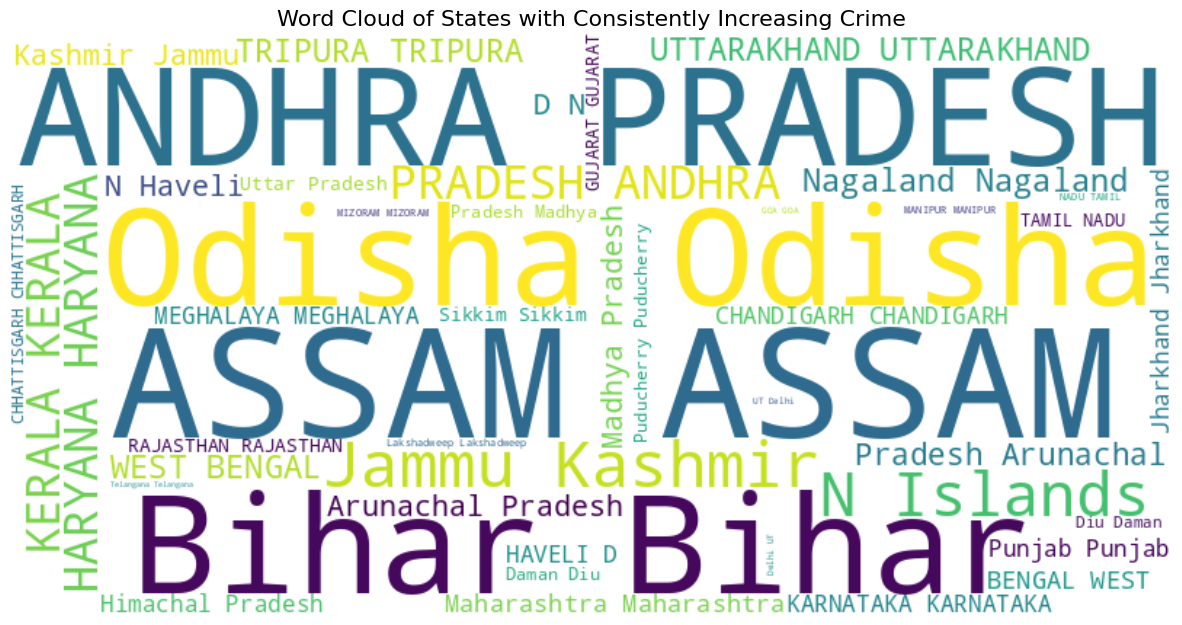

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a string of all state names with increasing crime
states_string = ' '.join(increasing_states['State'].tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(states_string)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of States with Consistently Increasing Crime', fontsize=16)
plt.show()


Data Quality: The code includes a placeholder for data cleaning and standardization. You can customize this part based on your specific data needs.



Total Crimes Calculation: The Total Crimes column is calculated as before.



Grouping and Differences: The data is grouped by State and Year, and year-over-year differences are calculated.


Filtering:
States with consistently increasing crime rates are identified.


Visualization:
A bar plot is created to visualize the total crimes for the identified states.


Statistical Analysis: A t-test is performed to compare the mean difference in total crimes for increasing and non-increasing states. You can adjust the statistical test based on your specific requirements

In [ ]:
import scipy.stats as stats

States with consistently increasing crime rates:
                 State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
3        A & N ISLANDS  2004          10                   3             0   
5        A & N ISLANDS  2006           6                   5             0   
6        A & N ISLANDS  2007           3                   9             1   
7        A & N ISLANDS  2008          12                  13             2   
8        A & N ISLANDS  2009          18                  14             1   
11       A & N Islands  2012          12                   7             2   
12       A & N Islands  2013          27                  12             1   
13       A & N Islands  2014          32                  17             0   
14       A & N Islands  2015          36                  21             0   
17       A & N Islands  2018          30                   2             0   
19       A & N Islands  2020          60                  90             1   
20       A & N 

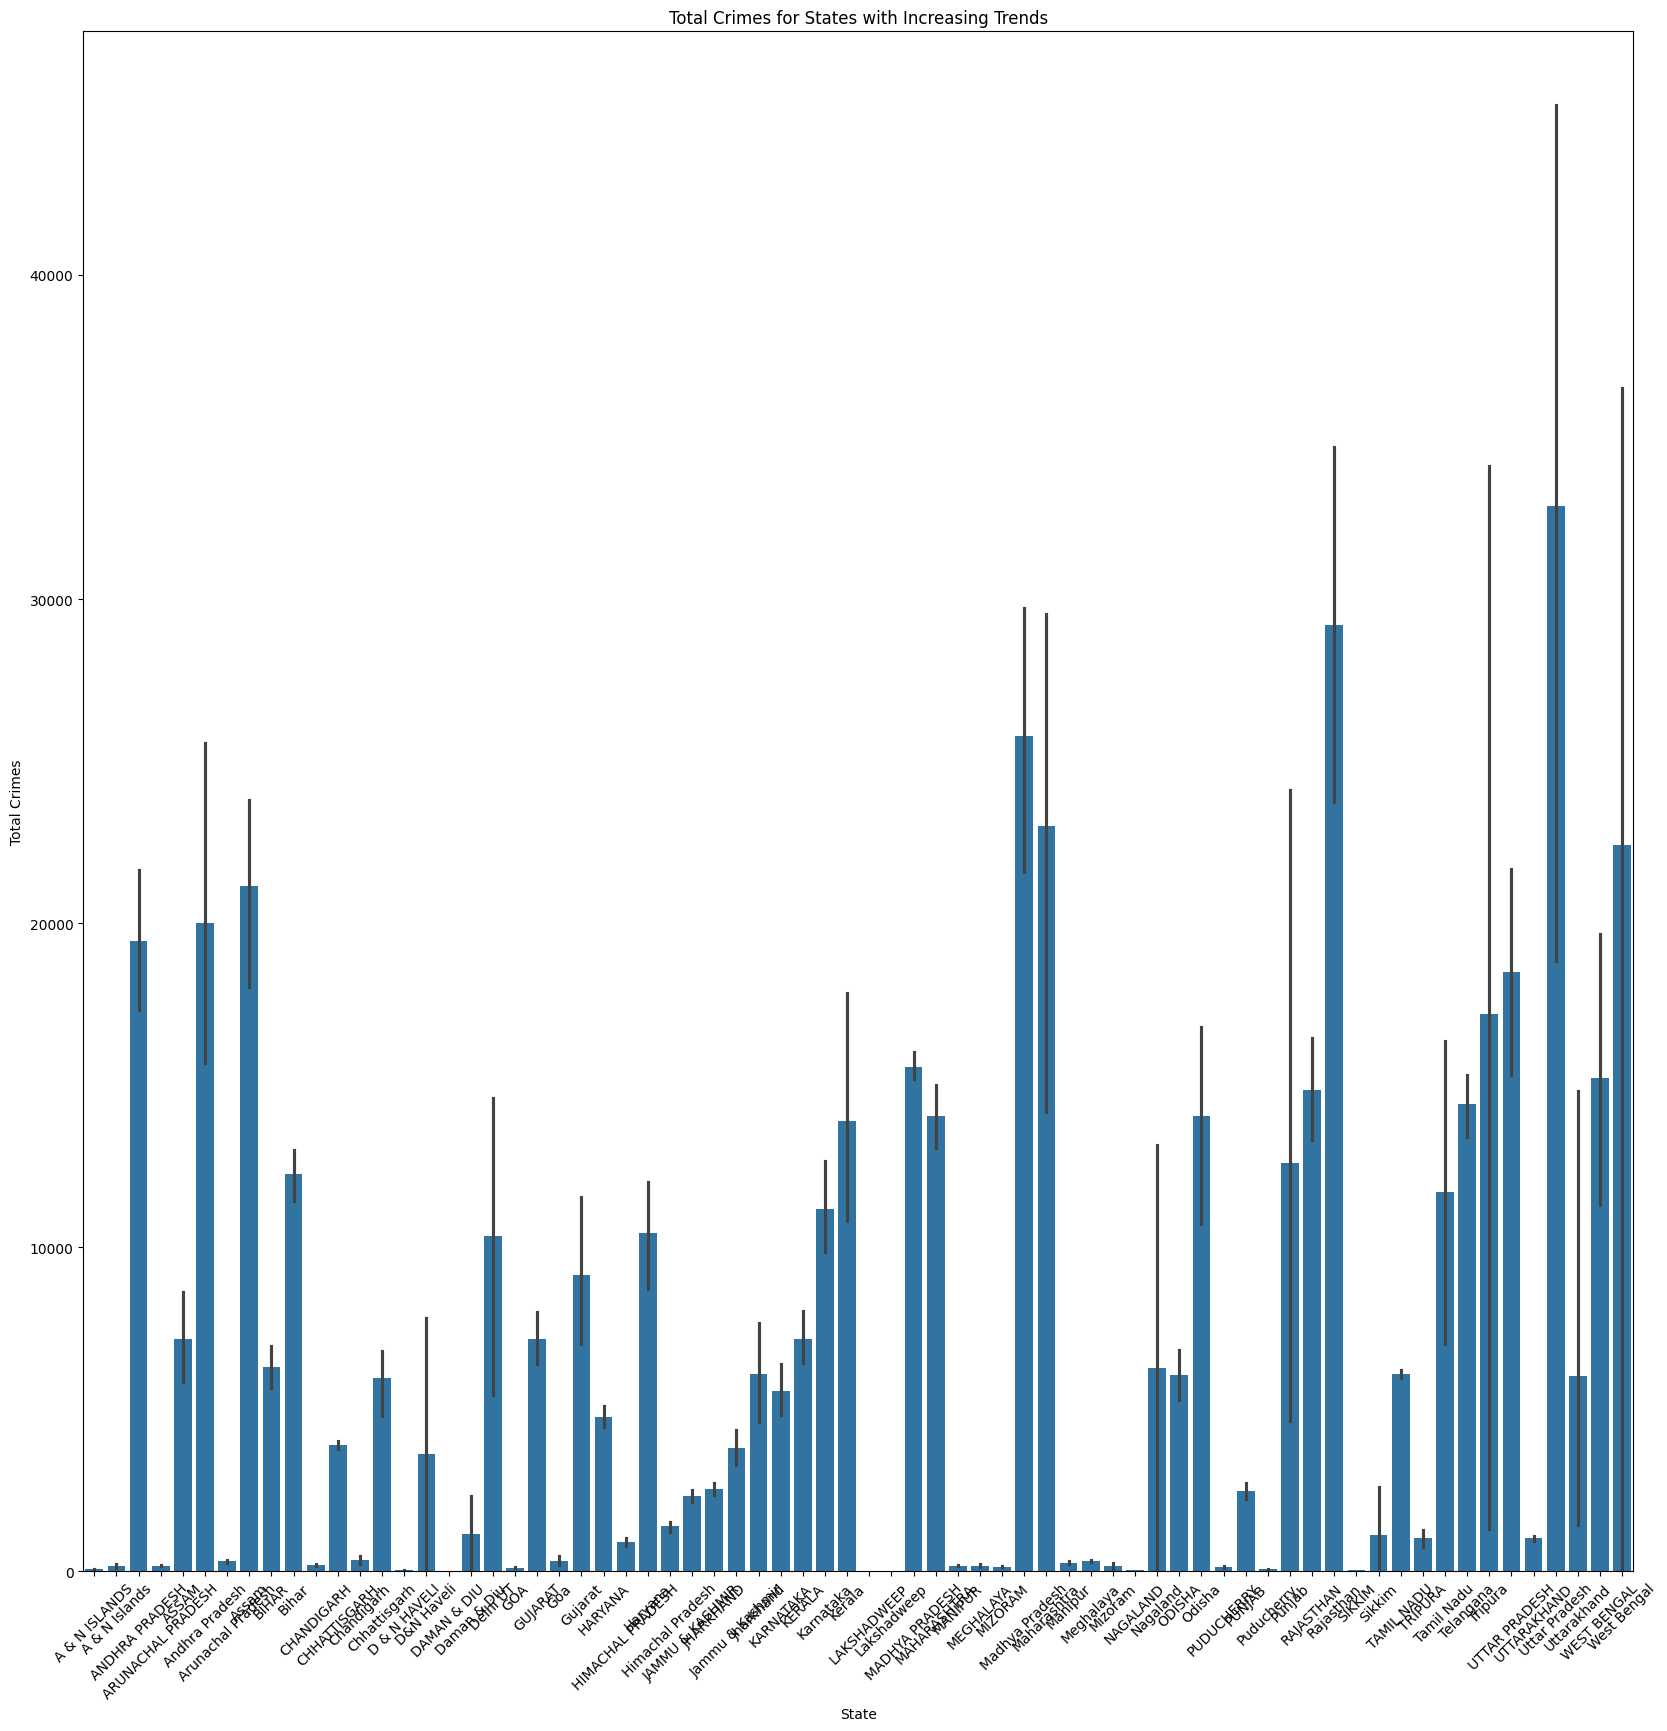

T-statistic: 8.317304480591366
P-value: 5.100663531510872e-16


In [ ]:
# Group data by State and Year
grouped_data = df.groupby(['State', 'Year']).sum().reset_index()

# Calculate year-over-year differences
grouped_data['Difference'] = grouped_data.groupby('State')['Total Crimes'].diff()

# Filter for states with consistently increasing crime
increasing_states = grouped_data[grouped_data['Difference'] > 0]

# Print or visualize the results
print("States with consistently increasing crime rates:")
print(increasing_states)

plt.figure(figsize=(20, 20))
# Visualize the trend of total crimes for increasing states (bar plot)
sns.barplot(x='State', y='Total Crimes', data=increasing_states)
plt.title('Total Crimes for States with Increasing Trends')
plt.xticks(rotation=45)
plt.show()

# Perform statistical analysis
# t-test to compare the mean difference in total crimes for increasing states
increasing_states_mean_diff = increasing_states['Difference'].mean()
non_increasing_states = grouped_data[grouped_data['Difference'] <= 0]
non_increasing_states_mean_diff = non_increasing_states['Difference'].mean()

t_statistic, p_value = stats.ttest_ind(increasing_states['Difference'], non_increasing_states['Difference'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

In [ ]:
valid_states = ['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA',
 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY']


# Filter DataFrame to keep only valid states
df_filtered = df[df['State'].isin(valid_states)]

# Print the filtered DataFrame
print(df_filtered.head(20))

                State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
0      ANDHRA PRADESH  2001         871                 765           420   
1   ARUNACHAL PRADESH  2001          33                  55             0   
2               ASSAM  2001         817                1070            59   
3               BIHAR  2001         888                 518           859   
4        CHHATTISGARH  2001         959                 171            70   
5                 GOA  2001          12                   6             2   
6             GUJARAT  2001         286                 857            67   
7             HARYANA  2001         398                 297           285   
8    HIMACHAL PRADESH  2001         124                 105            10   
9     JAMMU & KASHMIR  2001         169                 504            13   
10          JHARKHAND  2001         567                 279           217   
11          KARNATAKA  2001         293                 271           220   

In [ ]:
df_filtered.shape

(340, 10)

Observations:
So now we have only 340 rows and 10 columns left

States with consistently increasing crime rates:
                 State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
3        A & N ISLANDS  2004          10                   3             0   
5        A & N ISLANDS  2006           6                   5             0   
6        A & N ISLANDS  2007           3                   9             1   
7        A & N ISLANDS  2008          12                  13             2   
8        A & N ISLANDS  2009          18                  14             1   
11      ANDHRA PRADESH  2002        1002                 854           449   
12      ANDHRA PRADESH  2003         946                 931           466   
13      ANDHRA PRADESH  2004        1016                1030           512   
14      ANDHRA PRADESH  2005         935                 995           443   
15      ANDHRA PRADESH  2006        1049                1329           519   
16      ANDHRA PRADESH  2007        1070                1564           613   
18      ANDHRA 

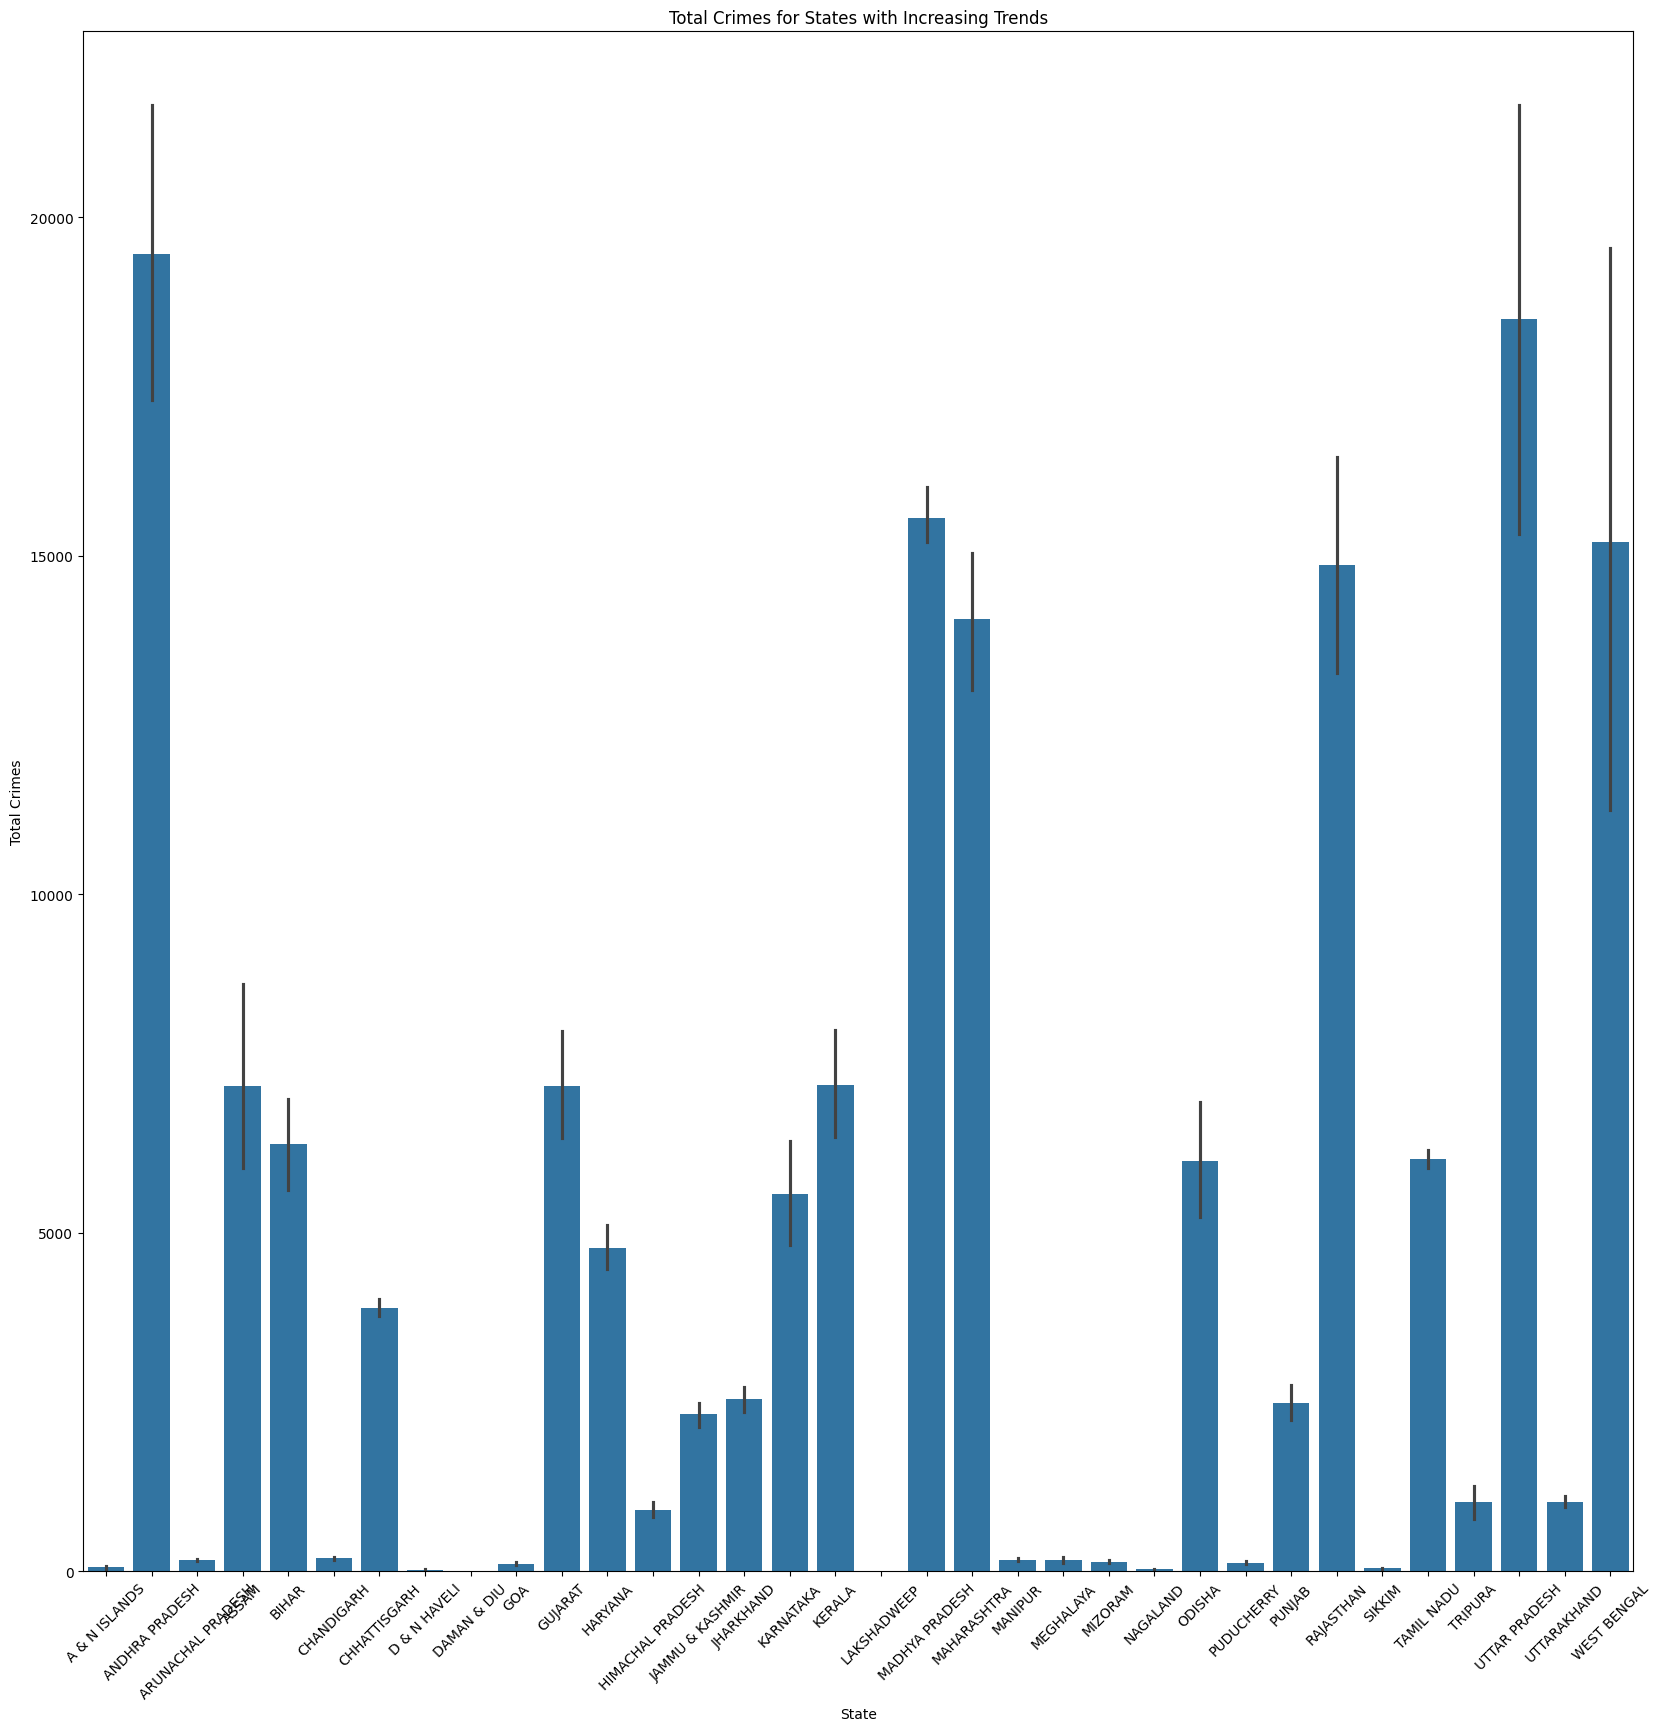

T-statistic: 8.694825046246232
P-value: 2.2091294484088018e-16


In [ ]:
grouped_data = df_filtered.groupby(['State', 'Year']).sum().reset_index()

# Calculate year-over-year differences
grouped_data['Difference'] = grouped_data.groupby('State')['Total Crimes'].diff()

# Filter for states with consistently increasing crime
increasing_states = grouped_data[grouped_data['Difference'] > 0]

# Print or visualize the results
print("States with consistently increasing crime rates:")
print(increasing_states)

plt.figure(figsize=(20, 20))
# Visualize the trend of total crimes for increasing states (bar plot)
sns.barplot(x='State', y='Total Crimes', data=increasing_states)
plt.title('Total Crimes for States with Increasing Trends')
plt.xticks(rotation=45)
plt.show()

# Perform statistical analysis
#  t-test to compare the mean difference in total crimes for increasing states
increasing_states_mean_diff = increasing_states['Difference'].mean()
non_increasing_states = grouped_data[grouped_data['Difference'] <= 0]
non_increasing_states_mean_diff = non_increasing_states['Difference'].mean()

t_statistic, p_value = stats.ttest_ind(increasing_states['Difference'], non_increasing_states['Difference'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

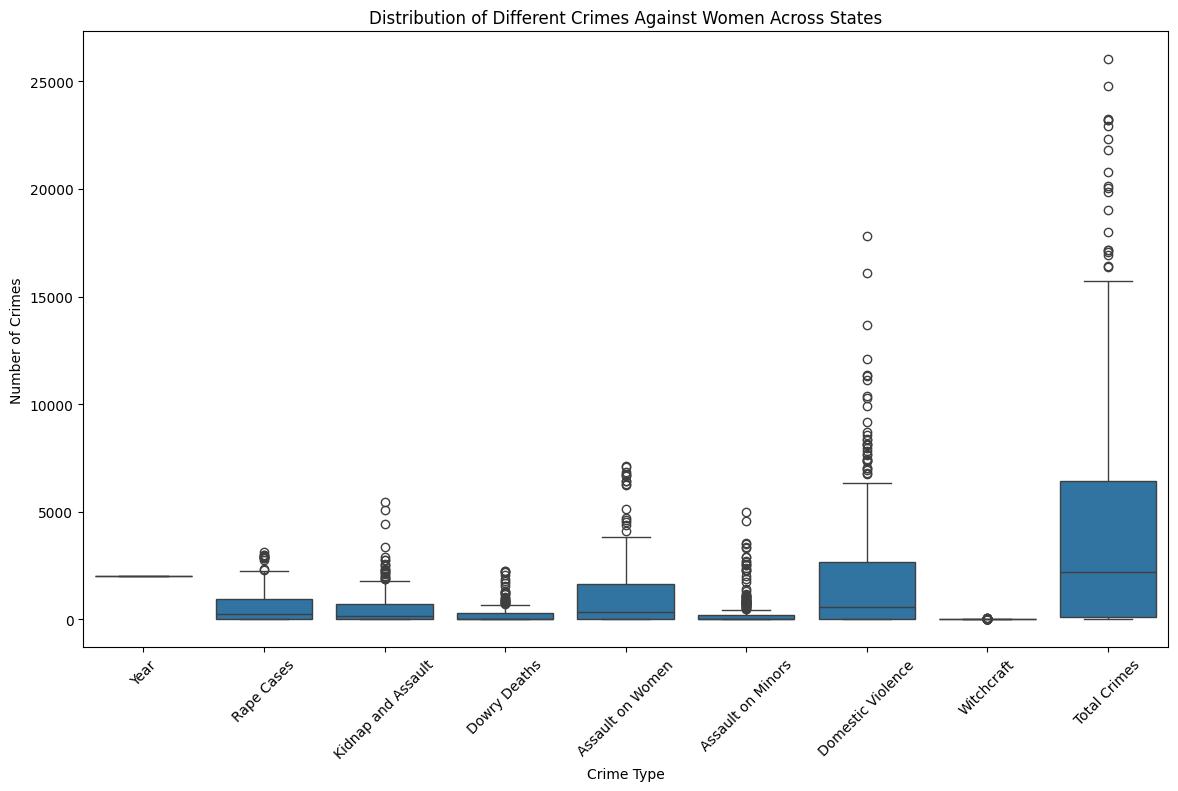

In [ ]:
# Melt the DataFrame to plot multiple crime types
melted_df = df_filtered.melt(id_vars=['State'], var_name='Crime Type', value_name='Number of Crimes')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Crime Type', y='Number of Crimes', data=melted_df)
plt.title('Distribution of Different Crimes Against Women Across States')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a scatter plot with states on the x-axis and a dummy y-axis (for visualization purposes)
fig = px.scatter(df_filtered,
                 x="State",
                 y=[0]*len(df_filtered),  # Dummy Y axis
                 size="Rape Cases",
                 color="Rape Cases",
                 hover_name="State",
                 title="Rape Cases in India by State",
                 size_max=100,
                 color_continuous_scale=px.colors.sequential.Viridis)  # Change color scale here

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Increase plot width
fig.update_layout(yaxis=dict(visible=False),
                  xaxis=dict(tickangle=45),
                  showlegend=False,
                  width=1200)  # Adjust width here

fig.show()

In [ ]:
df_filtered.columns

Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft', 'Total Crimes'],
      dtype='object')

In [ ]:
import plotly.express as px

# List of crime types to iterate through
crime_types = ["Rape Cases", 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft',]  # Add more crime types as needed

# Loop through each crime type and create a scatter plot
for crime in crime_types:
    fig = px.scatter(df_filtered,
                     x="State",
                     y=[0]*len(df_filtered),  # Dummy Y axis
                     size=crime,
                     color=crime,
                     hover_name="State",
                     title=f"{crime} in India by State",
                     size_max=100,
                     color_continuous_scale=px.colors.sequential.Viridis)  # Change color scale here

    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

    # Increase plot width
    fig.update_layout(yaxis=dict(visible=False),
                      xaxis=dict(tickangle=45),
                      showlegend=False,
                      width=1200)  # Adjust width here

    fig.show()

SUMMERY:

The primary objective of the above code is to analyze and visualize trends in crimes against women in India over the years (2001-2021). This involves identifying key patterns, state-wise distributions, and the evolution of different types of crimes such as Rape Cases, Kidnap and Assault, Dowry Deaths, Assault on Women, Assault on Minors, Domestic Violence, and Witchcraft.

Specifically, the goals of the analysis include:

Understanding Crime Trends Over Time:

Year-wise trend analysis: The code tracks how various types of crimes against women have evolved from 2001 to 2021, helping identify any spikes or declines in criminal activity.
State-wise Analysis:

State-level distribution: The analysis aims to uncover which states have the highest number of crimes, providing a comparative view of crime rates across regions.
States with consistently increasing crime rates: By identifying states where crime rates have been steadily rising, the analysis highlights critical regions for further policy attention.
Crime Distribution by Type:

Crime type comparison: By aggregating the total number of each type of crime, the work aims to provide insights into which types of crimes are most prevalent, revealing the severity and spread of various offenses against women.
Correlation and Statistical Analysis:

Correlation analysis: The code explores correlations between different crime types, revealing potential relationships or patterns that could indicate broader trends or root causes.
Statistical significance: Using hypothesis testing (T-test), the analysis compares the differences between states with increasing and non-increasing crime rates, providing statistical evidence of significant trends.
Visualizing Crime Patterns:

The objective is also to visually communicate insights using various plots (line plots, bar plots, scatter plots, pie charts, word clouds), which make it easier to interpret complex data and trends.
Scatter plots and heatmaps are used to highlight both temporal and spatial trends, while word clouds emphasize states with consistently high crime growth.
Identify Areas for Policy Intervention:

Through this data-driven approach, the objective is to identify states and crime types where interventions might be necessary, particularly where trends show consistent increases.

Refrences:
sir notebooks and Books
python documentation from https://docs.python.org/3/index.html

chatgpt,kaggle,
stack overflow,google